# Project: Comparing Machine Learning Algorithms for Alzheimer's Disease Classification
### DS2 - Group 3

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Data Dictionary
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Patient ID
- **PatientID**: A unique identifier assigned to each patient (4751 to 6900).

### Demographic Details
- **Age**: The age of the patients ranges from 60 to 90 years.
- **Gender**: Gender of the patients, where 0 represents Male and 1 represents Female.
- **Ethnicity**: The ethnicity of the patients, coded as follows:
  - 0: Caucasian
  - 1: African American
  - 2: Asian
  - 3: Other
- **EducationLevel**: The education level of the patients, coded as follows:
  - 0: None
  - 1: High School
  - 2: Bachelor's
  - 3: Higher

### Lifestyle Factors
- **BMI**: Body Mass Index of the patients, ranging from 15 to 40.
- **Smoking**: Smoking status, where 0 indicates No and 1 indicates Yes.
- **AlcoholConsumption**: Weekly alcohol consumption in units, ranging from 0 to 20.
- **PhysicalActivity**: Weekly physical activity in hours, ranging from 0 to 10.
- **DietQuality**: Diet quality score, ranging from 0 to 10.
- **SleepQuality**: Sleep quality score, ranging from 4 to 10.

### Medical History
- **FamilyHistoryAlzheimers**: Family history of Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.
- **CardiovascularDisease**: Presence of cardiovascular disease, where 0 indicates No and 1 indicates Yes.
- **Diabetes**: Presence of diabetes, where 0 indicates No and 1 indicates Yes.
- **Depression**: Presence of depression, where 0 indicates No and 1 indicates Yes.
- **HeadInjury**: History of head injury, where 0 indicates No and 1 indicates Yes.
- **Hypertension**: Presence of hypertension, where 0 indicates No and 1 indicates Yes.

### Clinical Measurements
- **SystolicBP**: Systolic blood pressure, ranging from 90 to 180 mmHg.
- **DiastolicBP**: Diastolic blood pressure, ranging from 60 to 120 mmHg.
- **CholesterolTotal**: Total cholesterol levels, ranging from 150 to 300 mg/dL.
- **CholesterolLDL**: Low-density lipoprotein cholesterol levels, ranging from 50 to 200 mg/dL.
- **CholesterolHDL**: High-density lipoprotein cholesterol levels, ranging from 20 to 100 mg/dL.
- **CholesterolTriglycerides**: Triglycerides levels, ranging from 50 to 400 mg/dL.

### Cognitive and Functional Assessments
- **MMSE**: Mini-Mental State Examination score, ranging from 0 to 30. Lower scores indicate cognitive impairment.
- **FunctionalAssessment**: Functional assessment score, ranging from 0 to 10. Lower scores indicate greater impairment.
- **MemoryComplaints**: Presence of memory complaints, where 0 indicates No and 1 indicates Yes.
- **BehavioralProblems**: Presence of behavioral problems, where 0 indicates No and 1 indicates Yes.
- **ADL**: Activities of Daily Living score, ranging from 0 to 10. Lower scores indicate greater impairment.

### Symptoms
- **Confusion**: Presence of confusion, where 0 indicates No and 1 indicates Yes.
- **Disorientation**: Presence of disorientation, where 0 indicates No and 1 indicates Yes.
- **PersonalityChanges**: Presence of personality changes, where 0 indicates No and 1 indicates Yes.
- **DifficultyCompletingTasks**: Presence of difficulty completing tasks, where 0 indicates No and 1 indicates Yes.
- **Forgetfulness**: Presence of forgetfulness, where 0 indicates No and 1 indicates Yes.

### Diagnosis Information
- **Diagnosis**: Diagnosis status for Alzheimer's Disease, where 0 indicates No and 1 indicates Yes.

### Confidential Information
- **DoctorInCharge**: This column contains confidential information about the doctor in charge, with "XXXConfid" as the value for all patients.


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Data Fetching
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Setting up to use Kaggle API

In order to retrieve dataset via API, user needs to (1) create a Kaggle account, (2) go to 'Account', and (3) click on 'Create New Token' under the API section. A json file containing your username and API key will download.

Copy this json file into the directory containing this notebook. For your reference, there is an empty one as an example.

If you have any issues, see here for more info: https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md

When downloading the dataset files from Kaggle, you may receive an SSL error message. This may happen if you are working on corporate-managed device, and throws a certificatie verification error. If you have trouble fetching, you can just skip to reading in copy from data/source.

In [1]:
# Our Imports
import pandas as pd
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import shapiro


In [2]:
# Open the file and load the data
with open('kaggle.json', 'r') as file:
    data = json.load(file)

# Extract username and key
username = data.get('username')
key = data.get('key')

# Set username and key as environment variables
os.environ['KAGGLE_USERNAME'] = username
os.environ['KAGGLE_KEY'] = key

# Now you should be able to import kaggle
import kaggle

In [3]:
# Authenticate (uses username and key) and download dataset (set unzip to True)
kaggle.api.authenticate()

# Downloads to 'source' directory
kaggle.api.dataset_download_files('rabieelkharoua/alzheimers-disease-dataset', path='data/source', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset


In [44]:
# Read in downloaded data using pandas and print out
data = pd.read_csv('data/source/alzheimers_disease_data.csv')

In [49]:
# Use head() to look at the columns
data.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  ...  MemoryComplaints  \
0           13.297218          6.327112     1.347214  ...                 0   
1            4.542524          7.619885     0.518767  ...                 0   
2           19.555085          7.844988     1.826335  ...                 0   
3           12.209266          8.428001     7.435604  ...                 0   
4           18.454356          6.310461     0.795498  ...                 0   

   BehavioralProblems       ADL  Confusion  Disorientation  \
0                   0  1.725883          0               0   
1                   0  2.592424          0               0   
2                   0  7.119548          0               1   
3                   1  6.481226          0               0   
4                   0  0.014691          0               0   

   PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  Diagnosis  \
0                   0                          1              0          0   
1                   0                          0              1          0   
2                   0                          1              0          0   
3                   0                          0              0          0   
4                   1                          1              0          0   

   DoctorInCharge  
0       XXXConfid  
1       XXXConfid  
2       XXXConfid  
3       XXXConfid  
4       XXXConfid  

[5 rows x 35 columns]

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Exploratory Data Analysis
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [4]:
# Describe data
data.describe()

PatientID          Age       Gender    Ethnicity  EducationLevel  \
count  2149.000000  2149.000000  2149.000000  2149.000000     2149.000000   
mean   5825.000000    74.908795     0.506282     0.697534        1.286645   
std     620.507185     8.990221     0.500077     0.996128        0.904527   
min    4751.000000    60.000000     0.000000     0.000000        0.000000   
25%    5288.000000    67.000000     0.000000     0.000000        1.000000   
50%    5825.000000    75.000000     1.000000     0.000000        1.000000   
75%    6362.000000    83.000000     1.000000     1.000000        2.000000   
max    6899.000000    90.000000     1.000000     3.000000        3.000000   

               BMI      Smoking  AlcoholConsumption  PhysicalActivity  \
count  2149.000000  2149.000000         2149.000000       2149.000000   
mean     27.655697     0.288506           10.039442          4.920202   
std       7.217438     0.453173            5.757910          2.857191   
min      15.008851     0.000000            0.002003          0.003616   
25%      21.611408     0.000000            5.139810          2.570626   
50%      27.823924     0.000000            9.934412          4.766424   
75%      33.869778     1.000000           15.157931          7.427899   
max      39.992767     1.000000           19.989293          9.987429   

       DietQuality  ...  FunctionalAssessment  MemoryComplaints  \
count  2149.000000  ...           2149.000000       2149.000000   
mean      4.993138  ...              5.080055          0.208004   
std       2.909055  ...              2.892743          0.405974   
min       0.009385  ...              0.000460          0.000000   
25%       2.458455  ...              2.566281          0.000000   
50%       5.076087  ...              5.094439          0.000000   
75%       7.558625  ...              7.546981          0.000000   
max       9.998346  ...              9.996467          1.000000   

       BehavioralProblems          ADL    Confusion  Disorientation  \
count         2149.000000  2149.000000  2149.000000     2149.000000   
mean             0.156817     4.982958     0.205212        0.158213   
std              0.363713     2.949775     0.403950        0.365026   
min              0.000000     0.001288     0.000000        0.000000   
25%              0.000000     2.342836     0.000000        0.000000   
50%              0.000000     5.038973     0.000000        0.000000   
75%              0.000000     7.581490     0.000000        0.000000   
max              1.000000     9.999747     1.000000        1.000000   

       PersonalityChanges  DifficultyCompletingTasks  Forgetfulness  \
count         2149.000000                2149.000000    2149.000000   
mean             0.150768                   0.158678       0.301536   
std              0.357906                   0.365461       0.459032   
min              0.000000                   0.000000       0.000000   
25%              0.000000                   0.000000       0.000000   
50%              0.000000                   0.000000       0.000000   
75%              0.000000                   0.000000       1.000000   
max              1.000000                   1.000000       1.000000   

         Diagnosis  
count  2149.000000  
mean      0.353653  
std       0.478214  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 34 columns]

In [5]:
# Check shape
print(data.shape)

(2149, 35)


In [6]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Data Cleaning
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
# Calculating the percentage of missing values in each column of our data
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

PatientID                    0.0
Age                          0.0
Gender                       0.0
Ethnicity                    0.0
EducationLevel               0.0
BMI                          0.0
Smoking                      0.0
AlcoholConsumption           0.0
PhysicalActivity             0.0
DietQuality                  0.0
SleepQuality                 0.0
FamilyHistoryAlzheimers      0.0
CardiovascularDisease        0.0
Diabetes                     0.0
Depression                   0.0
HeadInjury                   0.0
Hypertension                 0.0
SystolicBP                   0.0
DiastolicBP                  0.0
CholesterolTotal             0.0
CholesterolLDL               0.0
CholesterolHDL               0.0
CholesterolTriglycerides     0.0
MMSE                         0.0
FunctionalAssessment         0.0
MemoryComplaints             0.0
BehavioralProblems           0.0
ADL                          0.0
Confusion                    0.0
Disorientation               0.0
Personalit

In [9]:
# Check for duplicates
print(data.duplicated().sum())

0



## Changing Data Types
In the source data, all of the features are numerical (int and float).

We decided to apply the following changes to our data types:

### Continuous Data
- Age 
- BMI
- AlcoholConsumption
- PhysicalActivity
- DietQuality
- SleepQuality
- SystolicBP
- DiastolicBP
- CholesterolTotal
- CholesterolLDL
- CholesterolHDL
- CholesterolTriglycerides
- MMSE
- FunctionalAssessment
- ADL

### Categorical Data
- Gender
- Ethnicity
- EducationLevel
- Smoking
- FamilyHistoryAlzheimers
- CardiovascularDisease
- Diabetes
- Depression
- HeadInjury
- Hypertension
- MemoryComplaints
- BehavioralProblems
- Confusion
- Disorientation
- PersonalityChanges
- DifficultyCompletingTasks
- Forgetfulness
- Diagnosis

In [59]:
# Define list of categorical variables
categorical_vars = ['Gender', 'Ethnicity', 'EducationLevel', 'Smoking',
                    'FamilyHistoryAlzheimers', 'CardiovascularDisease',
                    'Diabetes', 'Depression', 'HeadInjury','MemoryComplaints',
                    'BehavioralProblems', 'Confusion', 'Disorientation', 'Hypertension',
                    'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


# Convert appropriate columns to 'category' type for categorical analysis
for var in categorical_vars:
    data[var] = data[var].astype('category')

# Check
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   PatientID                  2149 non-null   int64   
 1   Age                        2149 non-null   int64   
 2   Gender                     2149 non-null   category
 3   Ethnicity                  2149 non-null   category
 4   EducationLevel             2149 non-null   category
 5   BMI                        2149 non-null   float64 
 6   Smoking                    2149 non-null   category
 7   AlcoholConsumption         2149 non-null   float64 
 8   PhysicalActivity           2149 non-null   float64 
 9   DietQuality                2149 non-null   float64 
 10  SleepQuality               2149 non-null   float64 
 11  FamilyHistoryAlzheimers    2149 non-null   category
 12  CardiovascularDisease      2149 non-null   category
 13  Diabetes                   2149 n

In [13]:
# Get the unique values and their counts in the DoctorInCharge column. It looks like this column has been anonymised.
doctor_counts = data['DoctorInCharge'].value_counts()

# Print the result
doctor_counts

DoctorInCharge
XXXConfid    2149
Name: count, dtype: int64

In [14]:
# Drop the columns using the exact names as they appear in the DataFrame
data = data.drop(['PatientID', 'DoctorInCharge'], axis=1)

In [24]:
# Create a category for BMI to compare to continuous variable in modeling
def bmi_category(bmi):
    if bmi < 18.5:
        return 0 # underweight
    elif 18.5 <= bmi <= 24.9:
        return 1 # normal weight
    elif 25 <= bmi <= 29.9:
        return 2 # over weight
    else:
        return 3 # obese

# Apply the function and convert to category
data['BMICategory'] = data['BMI'].apply(bmi_category).astype('category')

In [25]:
# Check
data.dtypes

Age                             int64
Gender                       category
Ethnicity                    category
EducationLevel               category
BMI                           float64
Smoking                      category
AlcoholConsumption            float64
PhysicalActivity              float64
DietQuality                   float64
SleepQuality                  float64
FamilyHistoryAlzheimers      category
CardiovascularDisease        category
Diabetes                     category
Depression                   category
HeadInjury                   category
Hypertension                 category
SystolicBP                      int64
DiastolicBP                     int64
CholesterolTotal              float64
CholesterolLDL                float64
CholesterolHDL                float64
CholesterolTriglycerides      float64
MMSE                          float64
FunctionalAssessment          float64
MemoryComplaints             category
BehavioralProblems           category
ADL         

#### One-Hot Encoding for Categorical Variables

Convert categorical variables (Gender, Ethnicity, EducationLevel and BMICategory) into binary variables.

In [28]:
# Check values of categorical variables to see if any need converting further
for var in categorical_vars:
    print (data[var].value_counts())

Gender
1    1088
0    1061
Name: count, dtype: int64
Ethnicity
0    1278
1     454
3     211
2     206
Name: count, dtype: int64
EducationLevel
1    854
2    636
0    446
3    213
Name: count, dtype: int64
Smoking
0    1529
1     620
Name: count, dtype: int64
FamilyHistoryAlzheimers
0    1607
1     542
Name: count, dtype: int64
CardiovascularDisease
0    1839
1     310
Name: count, dtype: int64
Diabetes
0    1825
1     324
Name: count, dtype: int64
Depression
0    1718
1     431
Name: count, dtype: int64
HeadInjury
0    1950
1     199
Name: count, dtype: int64
MemoryComplaints
0    1702
1     447
Name: count, dtype: int64
BehavioralProblems
0    1812
1     337
Name: count, dtype: int64
Confusion
0    1708
1     441
Name: count, dtype: int64
Disorientation
0    1809
1     340
Name: count, dtype: int64
Hypertension
0    1829
1     320
Name: count, dtype: int64
PersonalityChanges
0    1825
1     324
Name: count, dtype: int64
DifficultyCompletingTasks
0    1808
1     341
Name: count, dtype

In [60]:
# One-hot encoding the categorical variables that don't have an order (i.e., not ordinal)
# Just ethnicity
encoded_data = pd.get_dummies(data, columns=['Ethnicity'], drop_first=False)

# Display the first few rows of the updated encoded dataset
encoded_data.head()

PatientID  Age Gender EducationLevel        BMI Smoking  \
0       4751   73      0              2  22.927749       0   
1       4752   89      0              0  26.827681       0   
2       4753   73      0              1  17.795882       0   
3       4754   74      1              1  33.800817       1   
4       4755   89      0              0  20.716974       0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0           13.297218          6.327112     1.347214      9.025679  ...   
1            4.542524          7.619885     0.518767      7.151293  ...   
2           19.555085          7.844988     1.826335      9.673574  ...   
3           12.209266          8.428001     7.435604      8.392554  ...   
4           18.454356          6.310461     0.795498      5.597238  ...   

  Disorientation PersonalityChanges DifficultyCompletingTasks Forgetfulness  \
0              0                  0                         1             0   
1              0                  0                         0             1   
2              1                  0                         1             0   
3              0                  0                         0             0   
4              0                  1                         1             0   

  Diagnosis DoctorInCharge  Ethnicity_0  Ethnicity_1  Ethnicity_2  Ethnicity_3  
0         0      XXXConfid         True        False        False        False  
1         0      XXXConfid         True        False        False        False  
2         0      XXXConfid        False        False        False         True  
3         0      XXXConfid         True        False        False        False  
4         0      XXXConfid         True        False        False        False  

[5 rows x 38 columns]

In [61]:
# Check data
encoded_data.dtypes

PatientID                       int64
Age                             int64
Gender                       category
EducationLevel               category
BMI                           float64
Smoking                      category
AlcoholConsumption            float64
PhysicalActivity              float64
DietQuality                   float64
SleepQuality                  float64
FamilyHistoryAlzheimers      category
CardiovascularDisease        category
Diabetes                     category
Depression                   category
HeadInjury                   category
Hypertension                 category
SystolicBP                      int64
DiastolicBP                     int64
CholesterolTotal              float64
CholesterolLDL                float64
CholesterolHDL                float64
CholesterolTriglycerides      float64
MMSE                          float64
FunctionalAssessment          float64
MemoryComplaints             category
BehavioralProblems           category
ADL         

In [39]:
# Change dtypes of encoded data to category instead of bool for consistency
# Define the columns to change dtype
columns_to_convert = [
    'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3'
]

# Convert the specified columns to 'category' dtype
encoded_data[columns_to_convert] = encoded_data[columns_to_convert].astype('category')

In [63]:
# Split data into multiple dataframes for appropriate analysis
continuous_vars = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'MMSE', 
                   'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolHDL', 'FunctionalAssessment',
                   'CholesterolLDL', 'CholesterolTriglycerides', 'ADL', 'SleepQuality']
continuous_vars_df = pd.DataFrame(encoded_data, columns=continuous_vars)

# add ethnicity 
categorical_vars = categorical_vars.append(['Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3'])
categorical_vars_df = pd.DataFrame(encoded_data, columns=categorical_vars)

#encoded_categotical_vars_df = pd.DataFrame(encoded_data, columns=['Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3'])

In [36]:
continuous_vars_df

Age        BMI  AlcoholConsumption  PhysicalActivity  DietQuality  \
0      73  22.927749           13.297218          6.327112     1.347214   
1      89  26.827681            4.542524          7.619885     0.518767   
2      73  17.795882           19.555085          7.844988     1.826335   
3      74  33.800817           12.209266          8.428001     7.435604   
4      89  20.716974           18.454356          6.310461     0.795498   
...   ...        ...                 ...               ...          ...   
2144   61  39.121757            1.561126          4.049964     6.555306   
2145   75  17.857903           18.767261          1.360667     2.904662   
2146   77  15.476479            4.594670          9.886002     8.120025   
2147   78  15.299911            8.674505          6.354282     1.263427   
2148   72  33.289738            7.890703          6.570993     7.941404   

           MMSE  SystolicBP  DiastolicBP  CholesterolTotal  CholesterolHDL  \
0     21.463532         142           72        242.366840       33.682563   
1     20.613267         115           64        231.162595       79.028477   
2      7.356249          99          116        284.181858       69.772292   
3     13.991127         118          115        159.582240       68.457491   
4     13.517609          94          117        237.602184       56.874305   
...         ...         ...          ...               ...             ...   
2144   1.201190         122          101        280.476824       60.943092   
2145   6.458060         152          106        186.384436       93.649735   
2146  17.011003         115          118        237.024558       99.678209   
2147   4.030491         103           96        242.197192       81.281111   
2148  11.114777         166           78        283.396797       81.920043   

      FunctionalAssessment  CholesterolLDL  CholesterolTriglycerides  \
0                 6.518877       56.150897                162.189143   
1                 7.118696      193.407996                294.630909   
2                 5.895077      153.322762                 83.638324   
3                 8.965106       65.366637                277.577358   
4                 6.045039       92.869700                291.198780   
...                    ...             ...                       ...   
2144              0.238667       94.870490                234.520123   
2145              8.687480       95.410700                367.986877   
2146              1.972137      156.267294                294.802338   
2147              5.173891       52.482961                145.253746   
2148              6.307543       92.200064                217.396873   

           ADL  SleepQuality  
0     1.725883      9.025679  
1     2.592424      7.151293  
2     7.119548      9.673574  
3     6.481226      8.392554  
4     0.014691      5.597238  
...        ...           ...  
2144  4.492838      7.535540  
2145  9.204952      8.555256  
2146  5.036334      5.769464  
2147  3.785399      8.322874  
2148  8.327563      9.878711  

[2149 rows x 15 columns]

In [64]:
categorical_vars_df

PatientID  Age Gender EducationLevel        BMI Smoking  \
0          4751   73      0              2  22.927749       0   
1          4752   89      0              0  26.827681       0   
2          4753   73      0              1  17.795882       0   
3          4754   74      1              1  33.800817       1   
4          4755   89      0              0  20.716974       0   
...         ...  ...    ...            ...        ...     ...   
2144       6895   61      0              1  39.121757       0   
2145       6896   75      0              2  17.857903       0   
2146       6897   77      0              1  15.476479       0   
2147       6898   78      1              1  15.299911       0   
2148       6899   72      0              2  33.289738       0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  ...  \
0              13.297218          6.327112     1.347214      9.025679  ...   
1               4.542524          7.619885     0.518767      7.151293  ...   
2              19.555085          7.844988     1.826335      9.673574  ...   
3              12.209266          8.428001     7.435604      8.392554  ...   
4              18.454356          6.310461     0.795498      5.597238  ...   
...                  ...               ...          ...           ...  ...   
2144            1.561126          4.049964     6.555306      7.535540  ...   
2145           18.767261          1.360667     2.904662      8.555256  ...   
2146            4.594670          9.886002     8.120025      5.769464  ...   
2147            8.674505          6.354282     1.263427      8.322874  ...   
2148            7.890703          6.570993     7.941404      9.878711  ...   

     Disorientation PersonalityChanges DifficultyCompletingTasks  \
0                 0                  0                         1   
1                 0                  0                         0   
2                 1                  0                         1   
3                 0                  0                         0   
4                 0                  1                         1   
...             ...                ...                       ...   
2144              0                  0                         0   
2145              0                  0                         0   
2146              0                  0                         0   
2147              0                  0                         0   
2148              1                  0                         0   

     Forgetfulness Diagnosis DoctorInCharge  Ethnicity_0  Ethnicity_1  \
0                0         0      XXXConfid         True        False   
1                1         0      XXXConfid         True        False   
2                0         0      XXXConfid        False        False   
3                0         0      XXXConfid         True        False   
4                0         0      XXXConfid         True        False   
...            ...       ...            ...          ...          ...   
2144             0         1      XXXConfid         True        False   
2145             0         1      XXXConfid         True        False   
2146             0         1      XXXConfid         True        False   
2147             1         1      XXXConfid        False        False   
2148             1         0      XXXConfid         True        False   

      Ethnicity_2  Ethnicity_3  
0           False        False  
1           False        False  
2           False         True  
3           False        False  
4           False        False  
...           ...          ...  
2144        False        False  
2145        False        False  
2146        False        False  
2147        False         True  
2148        False        False  

[2149 rows x 38 columns]

In [41]:
encoded_categotical_vars_df

Ethnicity_0 Ethnicity_1 Ethnicity_2 Ethnicity_3
0           True       False       False       False
1           True       False       False       False
2          False       False       False        True
3           True       False       False       False
4           True       False       False       False
...          ...         ...         ...         ...
2144        True       False       False       False
2145        True       False       False       False
2146        True       False       False       False
2147       False       False       False        True
2148        True       False       False       False

[2149 rows x 4 columns]

## Distribution in Continuous Variables


### Plot 1

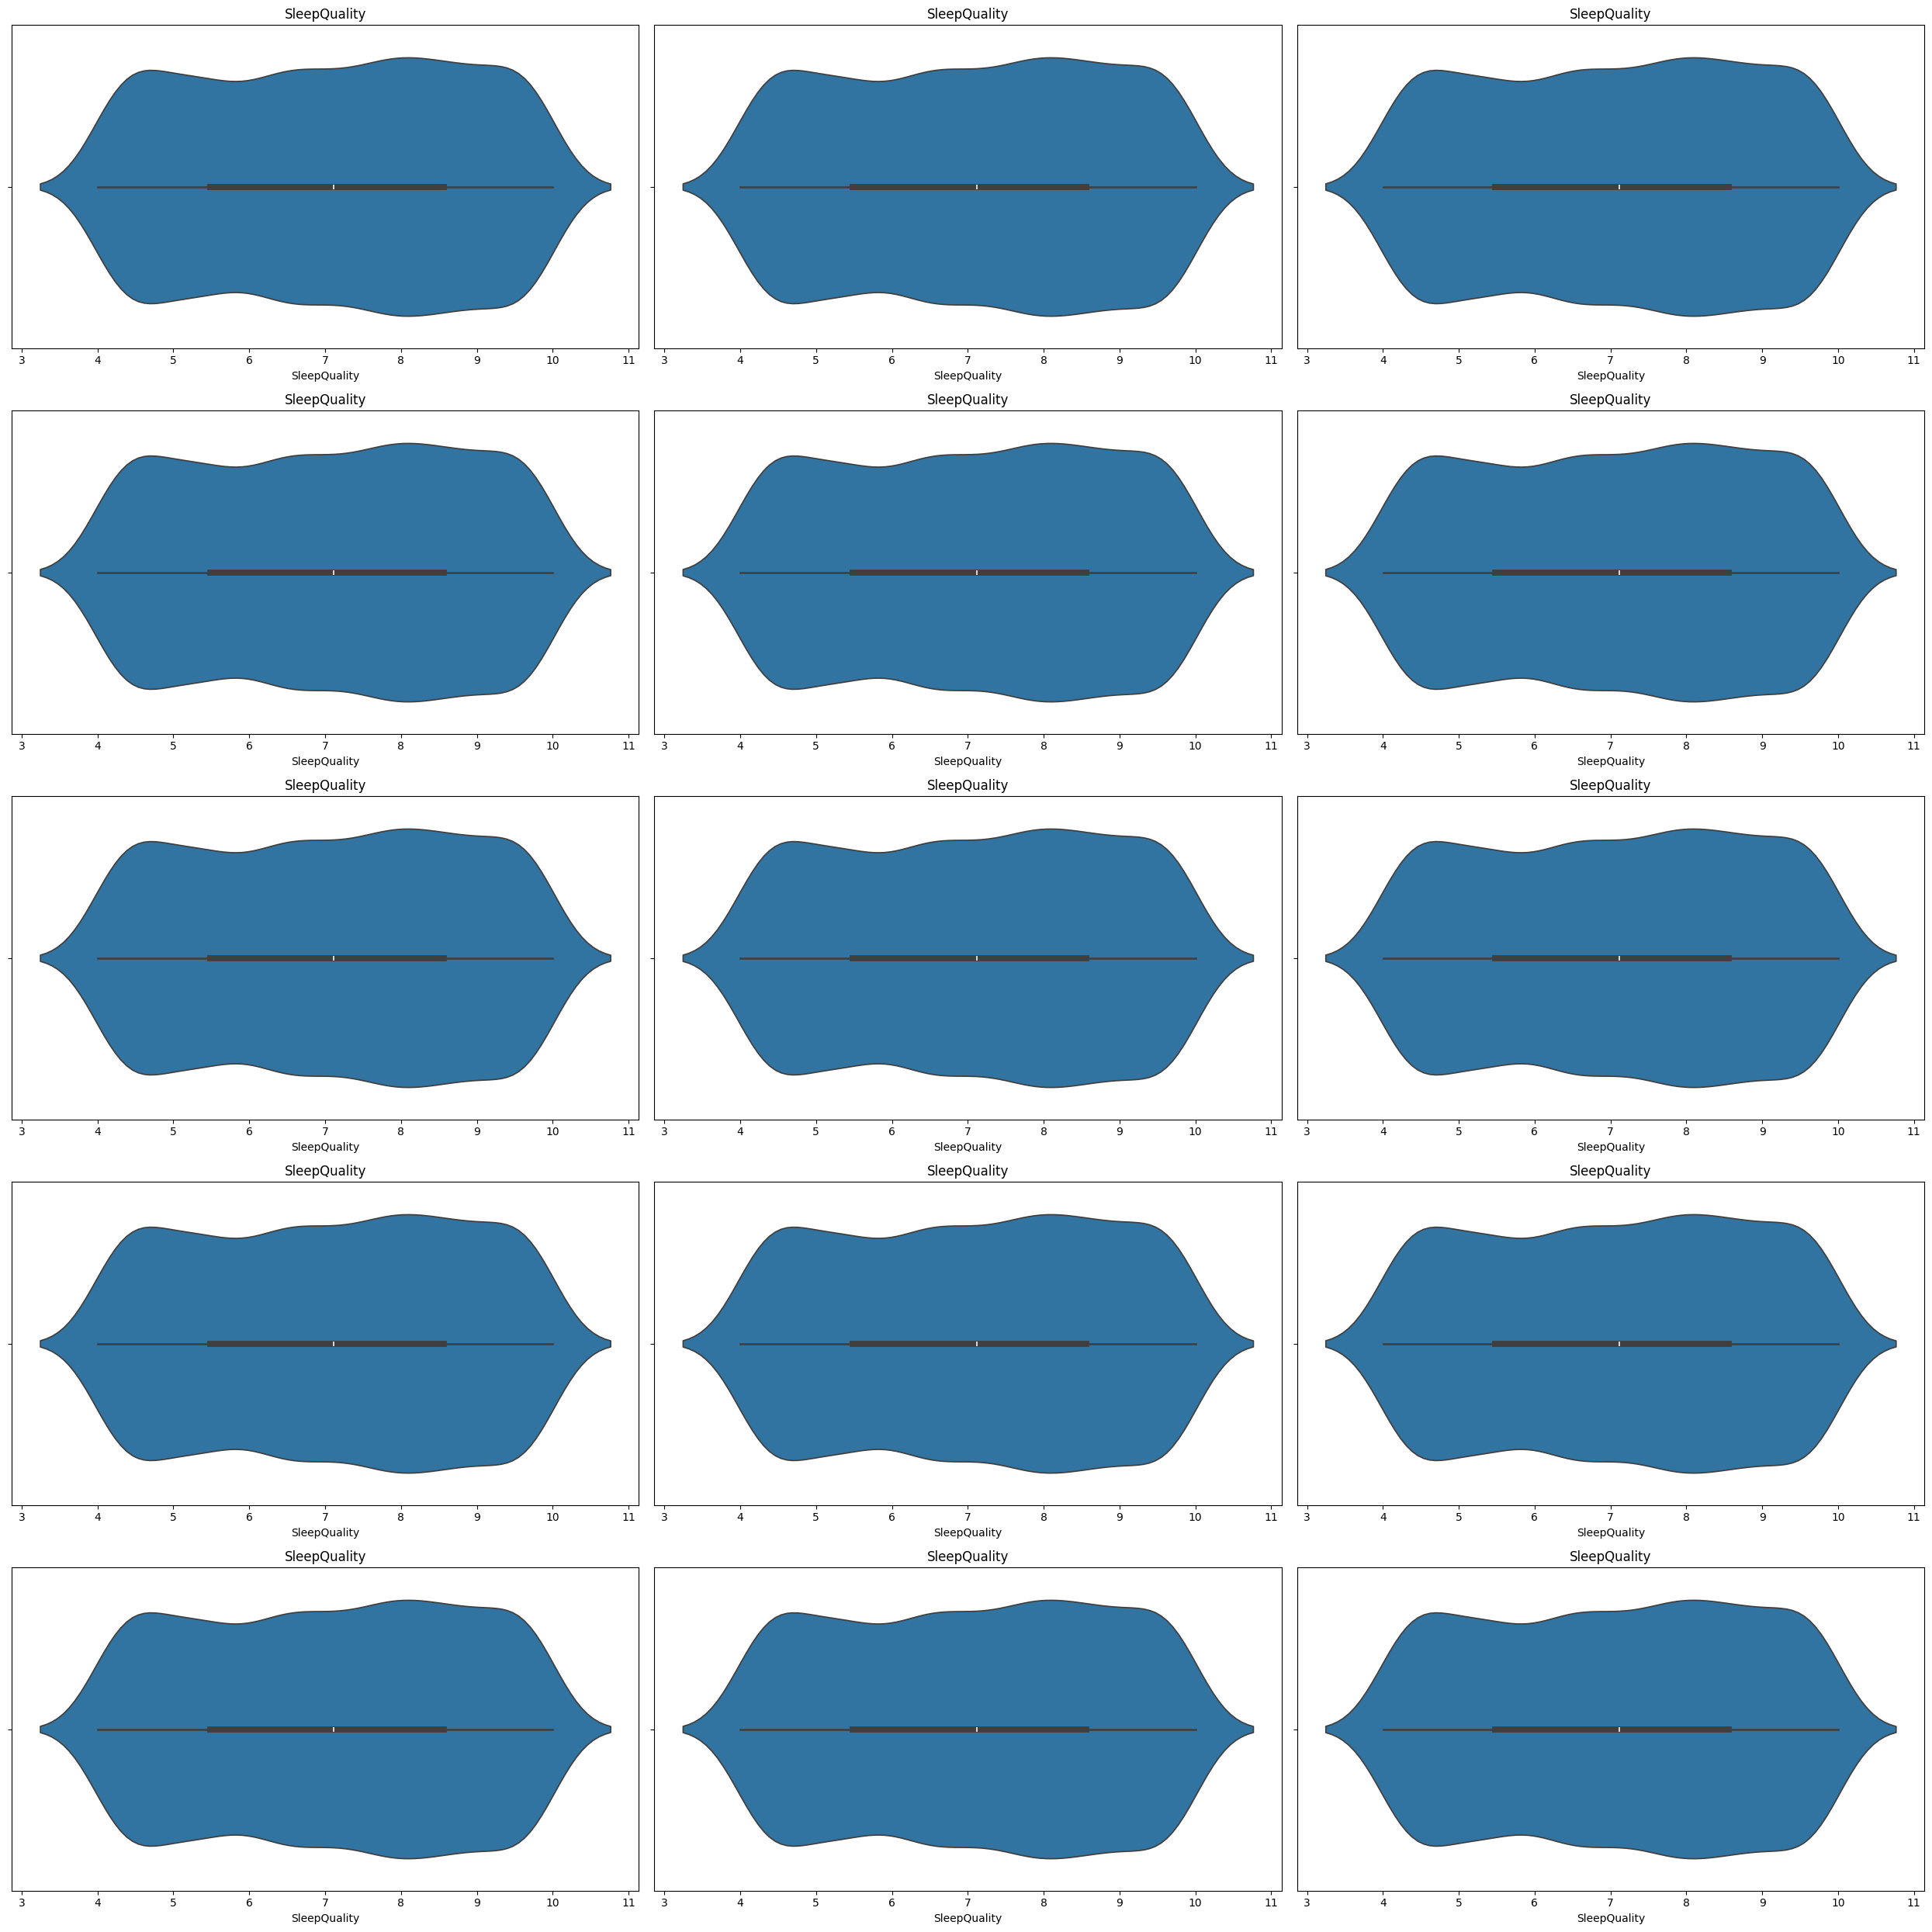

In [54]:
# Number of variables
num_vars = len(continuous_vars_df.columns)

# Determine the number of rows and columns for the grid
cols = 3  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Calculate rows required

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 25))

# Flatten the axes array for easy iteration in loop below
axes = axes.flatten()

# Loop over the variables create a violin plot for each one
for i, col in enumerate(continuous_vars_df.columns):
    sns.violinplot(x=encoded_data[feature], ax=axes[i])
    axes[i].set_title(feature)

# Adjust layout to 'tight'
plt.tight_layout()

# Show the plot
plt.show()

### Plot 2

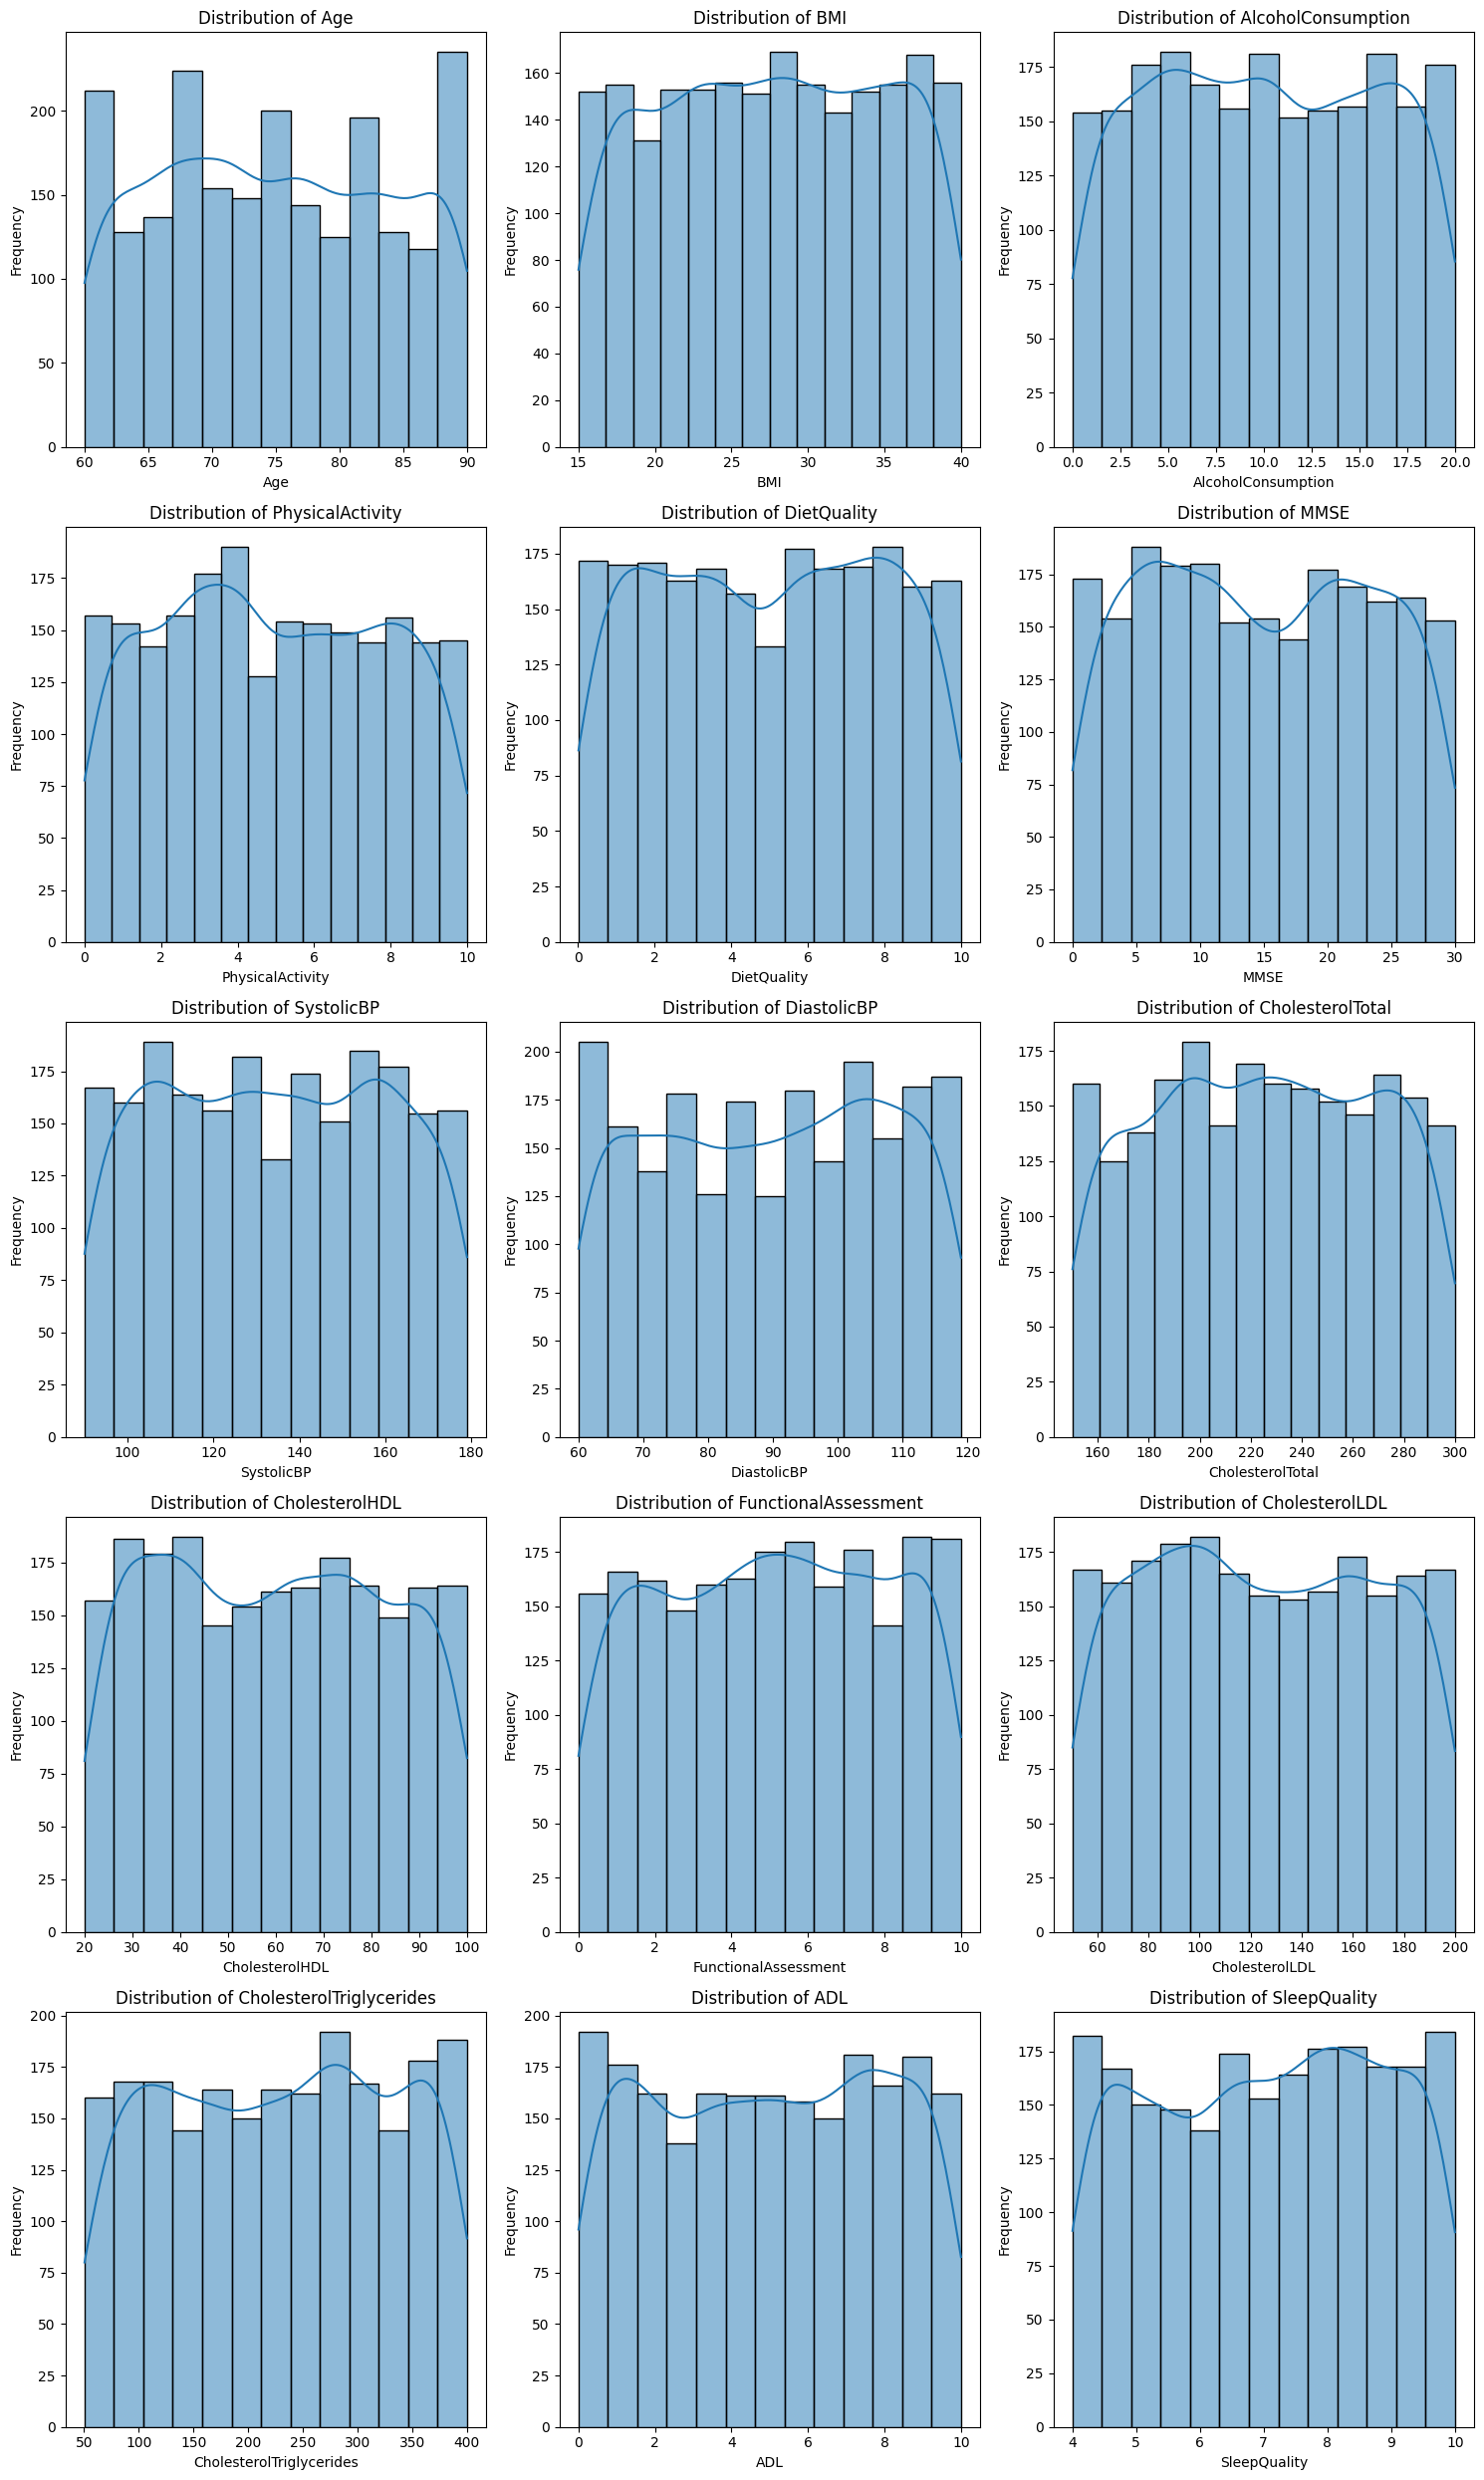

In [55]:
# Create the figure and the grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot each continuous variable
for i, col in enumerate(continuous_vars_df.columns):
    sns.histplot(continuous_vars_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Count Plots

### 1. Categorical Variables

/var/folders/gp/mjt2kkpn0ml3xc_8sp5j2m800000gn/T/ipykernel_24660/643325994.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=categorical_vars_df[col], palette='husl', ax=axes[i])
/var/folders/gp/mjt2kkpn0ml3xc_8sp5j2m800000gn/T/ipykernel_24660/643325994.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=categorical_vars_df[col], palette='husl', ax=axes[i])
/var/folders/gp/mjt2kkpn0ml3xc_8sp5j2m800000gn/T/ipykernel_24660/643325994.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=categorical_vars_df[col], pa

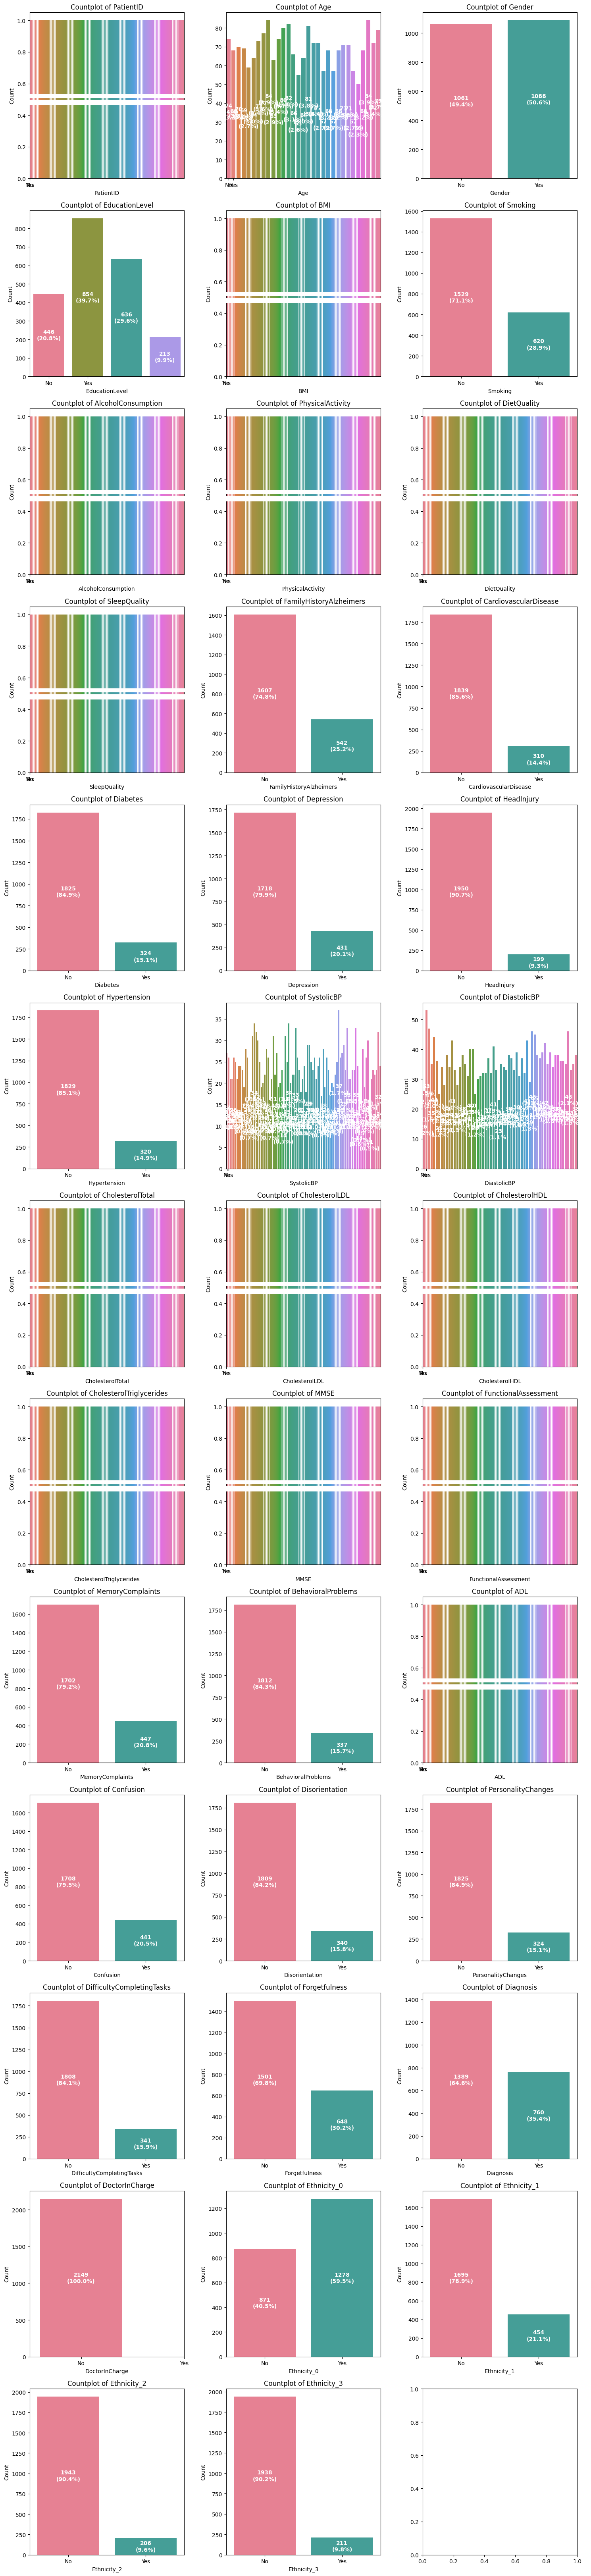

In [65]:
# Number of variables
num_vars = len(categorical_vars_df.columns)

# Determine the number of rows and columns for the grid
cols = 3  # Number of columns in the grid
rows = (num_vars + cols - 1) // cols  # Calculate rows required

# Create the figure and the grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot each categorical variable
for i, col in enumerate(categorical_vars_df.columns):
    ax = sns.countplot(x=categorical_vars_df[col], palette='husl', ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    
    # Set custom x-tick labels for "No" (0) and "Yes" (1)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])
    
    # Calculate percentages and annotate bars inside the bar
    total = len(categorical_vars_df[col])
    for p in ax.patches:
        count = int(p.get_height())
        percentage = 100 * count / total
        ax.annotate(f'{count}\n({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                    ha = 'center', va = 'center', 
                    color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### 2. Encoded Categorical Variables

C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\1592518089.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=aggregated_counts, palette='husl', ax=axes[i])
C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\1592518089.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=aggregated_counts, palette='husl', ax=axes[i])
C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\1592518089.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=aggregated_counts, palette='husl', ax=axes[i])
C:\Users\yasm

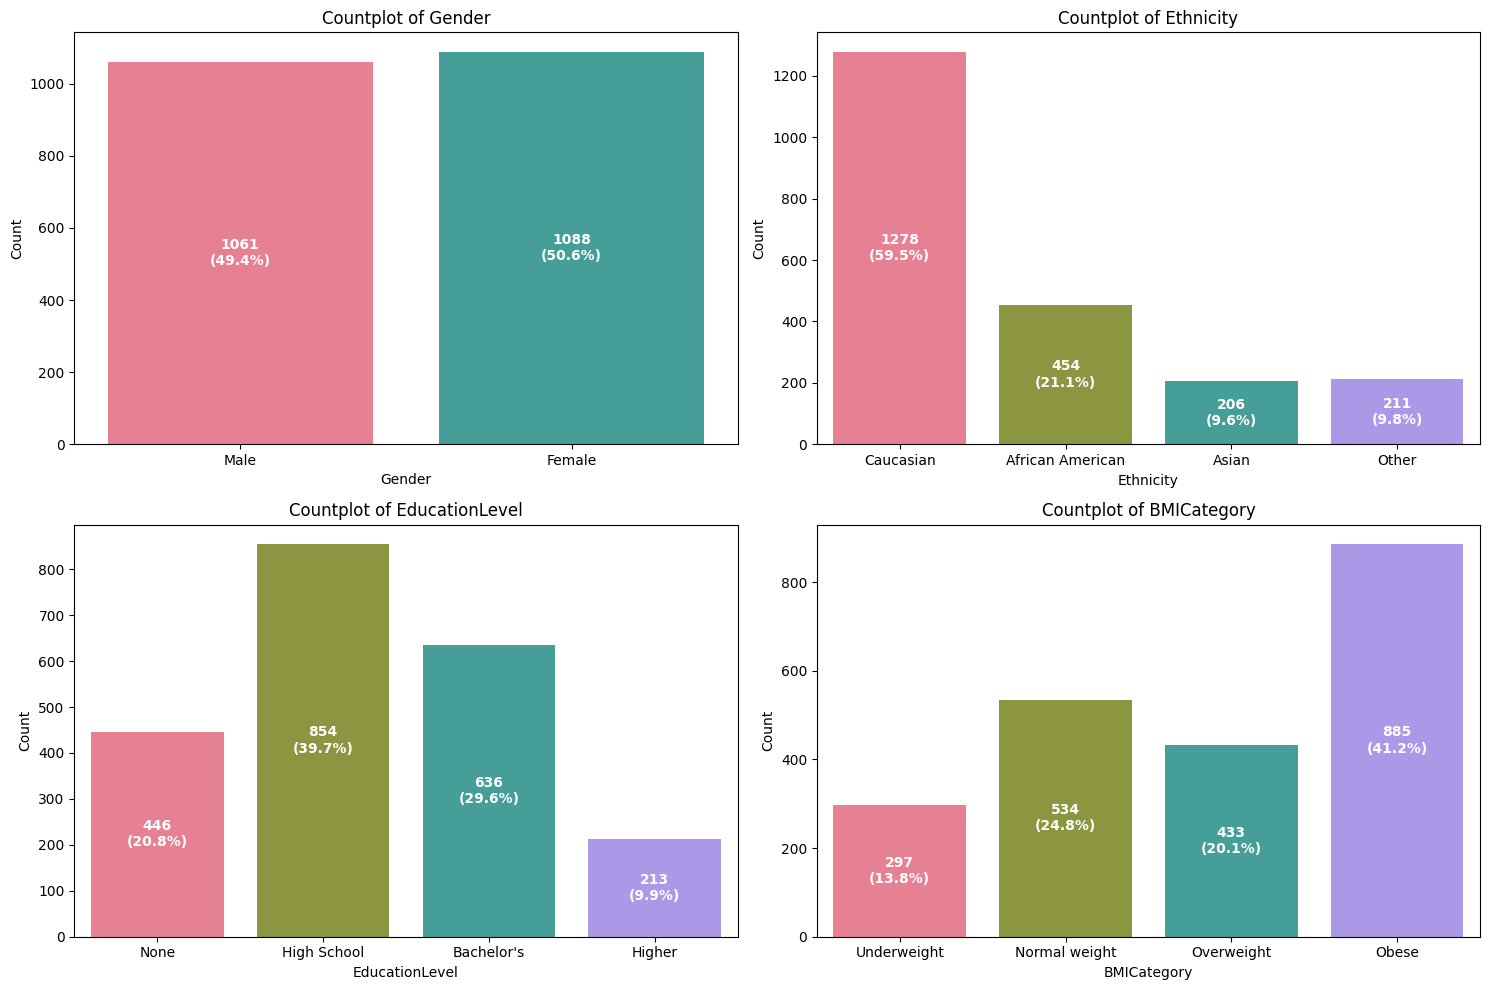

In [31]:
# Change one-hot encoded columns to numeric
encoded_categotical_vars_df = encoded_categotical_vars_df.apply(pd.to_numeric, errors='coerce')

# Define the one-hot encoded groups and corresponding labels
one_hot_groups = {
    'Gender': ['Gender_0', 'Gender_1'],
    'Ethnicity': ['Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3'],
    'EducationLevel': ['EducationLevel_0', 'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3'],
    'BMICategory': ['BMICategory_UnderWeight', 'BMICategory_NormalWeight', 'BMICategory_OverWeight', 'BMICategory_Obese']
}

custom_labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African American', 'Asian', 'Other'],
    'EducationLevel': ['None', 'High School', 'Bachelor\'s', 'Higher'],
    'BMICategory': ['Underweight', 'Normal weight', 'Overweight', 'Obese']
}

# Number of categories
num_categories = len(one_hot_groups)

# Determine the number of rows and columns for the grid
cols = 2  # Number of columns in the grid
rows = (num_categories + cols - 1) // cols  # Calculate rows required

# Create the figure and the grid of subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

# Plot each one-hot encoded categorical variable
for i, (category, columns) in enumerate(one_hot_groups.items()):
    aggregated_counts = encoded_categotical_vars_df[columns].sum()
    labels = custom_labels[category]
    
    ax = sns.barplot(x=labels, y=aggregated_counts, palette='husl', ax=axes[i])
    axes[i].set_title(f'Countplot of {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel('Count')
    
    # Calculate total for percentages
    total = aggregated_counts.sum()
    
    # Annotate bars with counts and percentages inside the bar
    for p, count in zip(ax.patches, aggregated_counts):
        percentage = 100 * count / total
        ax.annotate(f'{int(count)}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2),
                    ha='center', va='center',
                    color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


## Visualize Continuous Variables by Diagnosis

C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\1141267238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=encoded_data['Diagnosis'], y=continuous_vars_df[var], ax=axes[i], palette=['#6BAED6', '#FD8D3C'])
C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\1141267238.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Negative', 'Has Alzheimers'])
C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\1141267238.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=encoded_data['Diagnosis'], y=continuous_vars_df[var], ax=axes[i], palette=['#6BAED6', '#FD8D3C'])
C:\Users\yasme\App

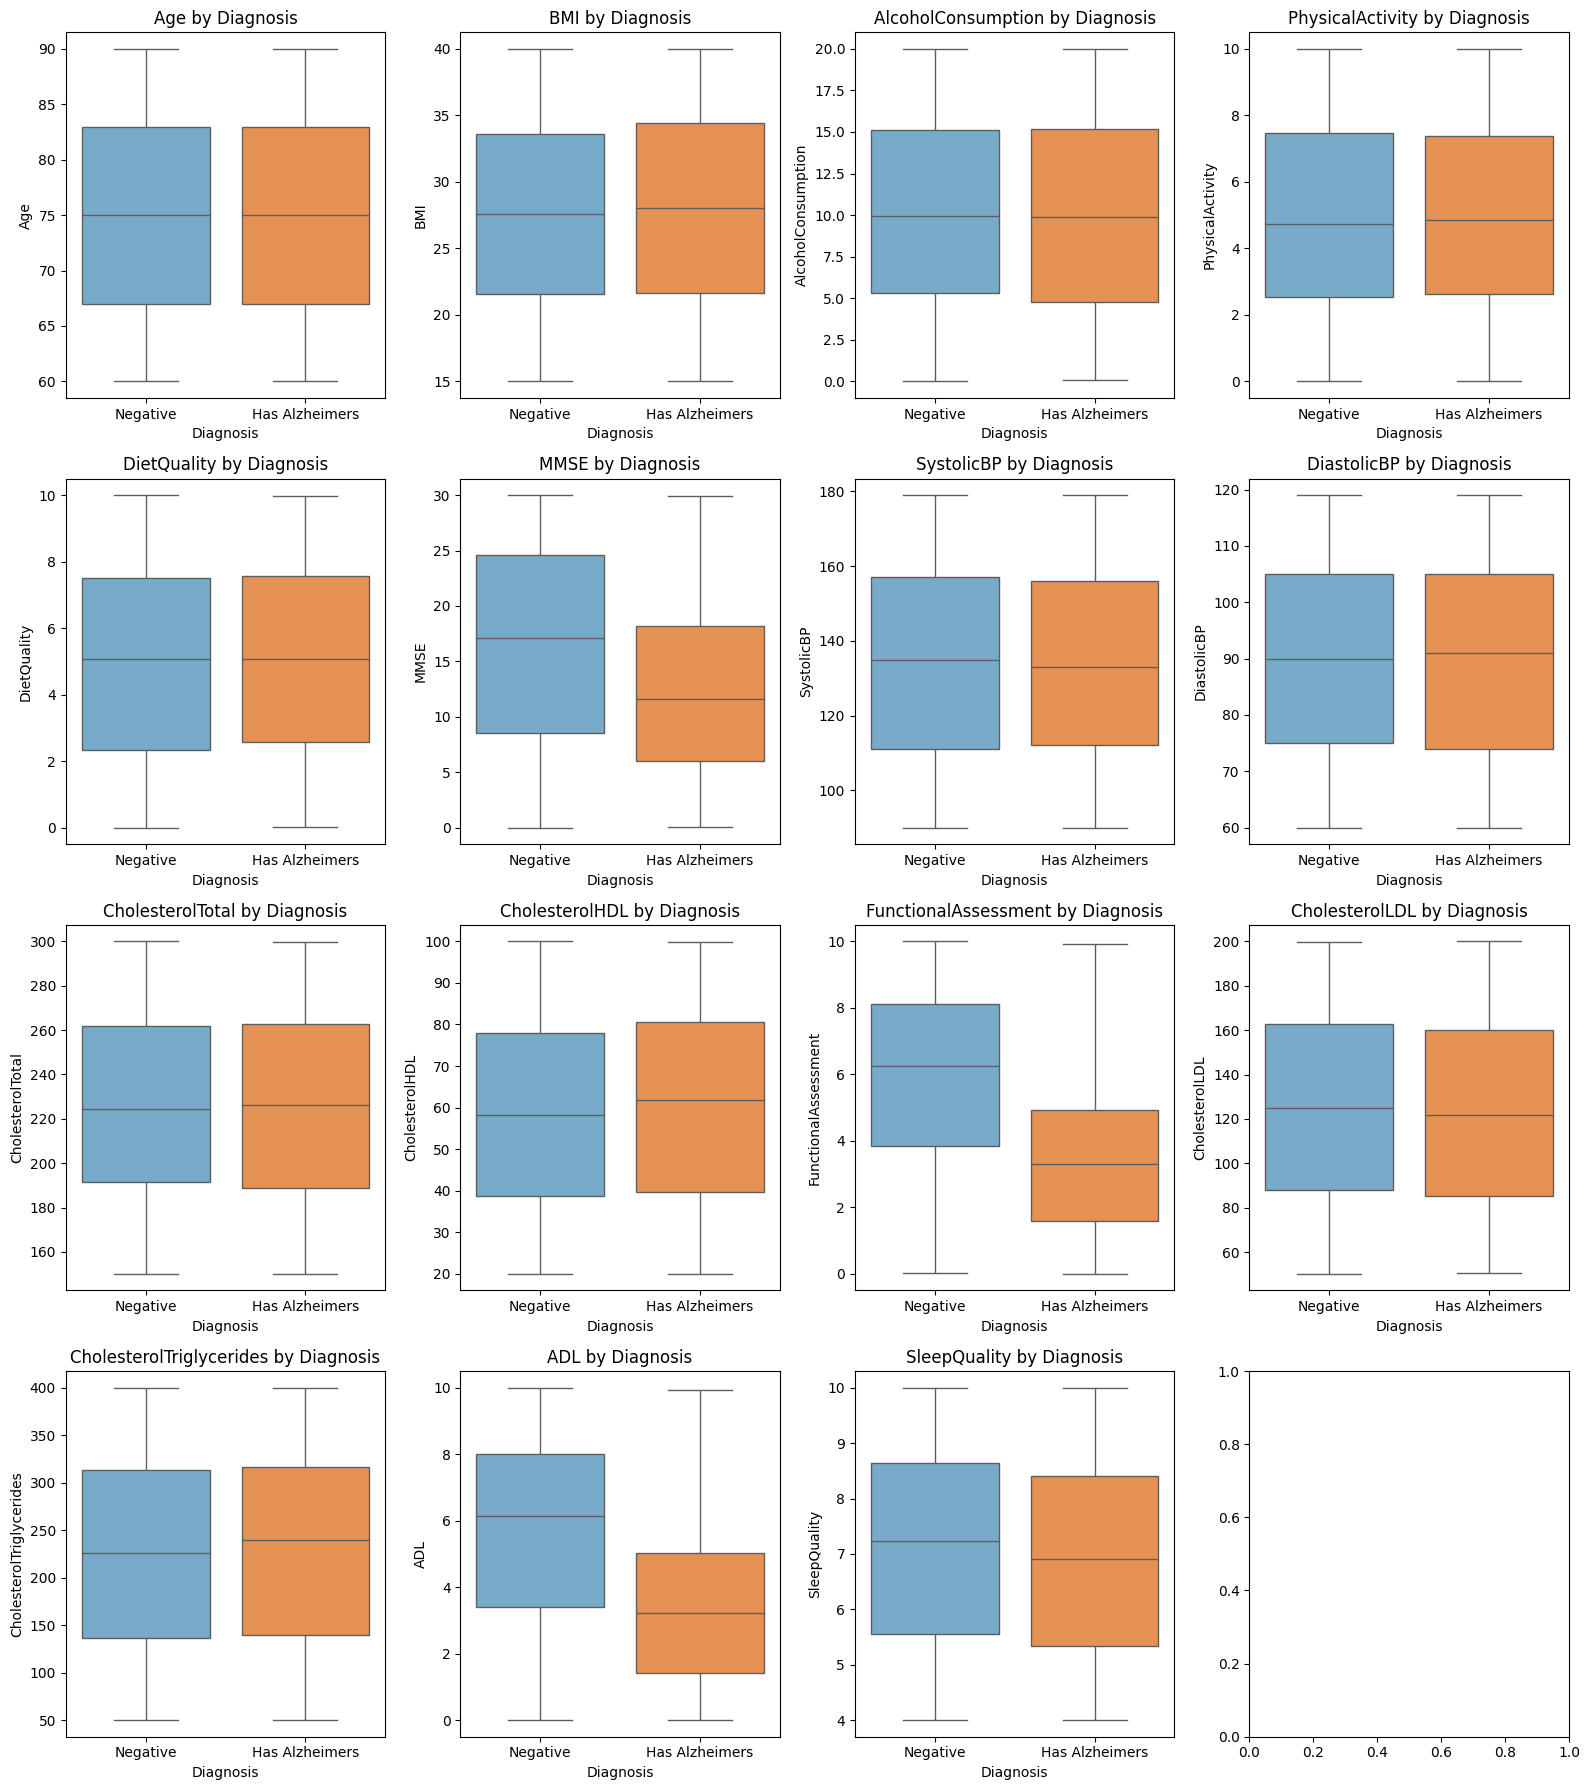

In [32]:
# Setup grid dimensions and figure
fig, axes = plt.subplots(4, 4, figsize=(16, 18))
axes = axes.flatten()

# Plot box plots for each continuous variable by Diagnosis
for i, var in enumerate(continuous_vars_df.columns):
    sns.boxplot(x=encoded_data['Diagnosis'], y=continuous_vars_df[var], ax=axes[i], palette=['#6BAED6', '#FD8D3C'])
    
    # Set title and labels
    axes[i].set_title(f'{var} by Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel(var)
    axes[i].set_xticklabels(['Negative', 'Has Alzheimers'])

plt.tight_layout()
plt.show()


## Visualize Categorical Variables by Diagnosis

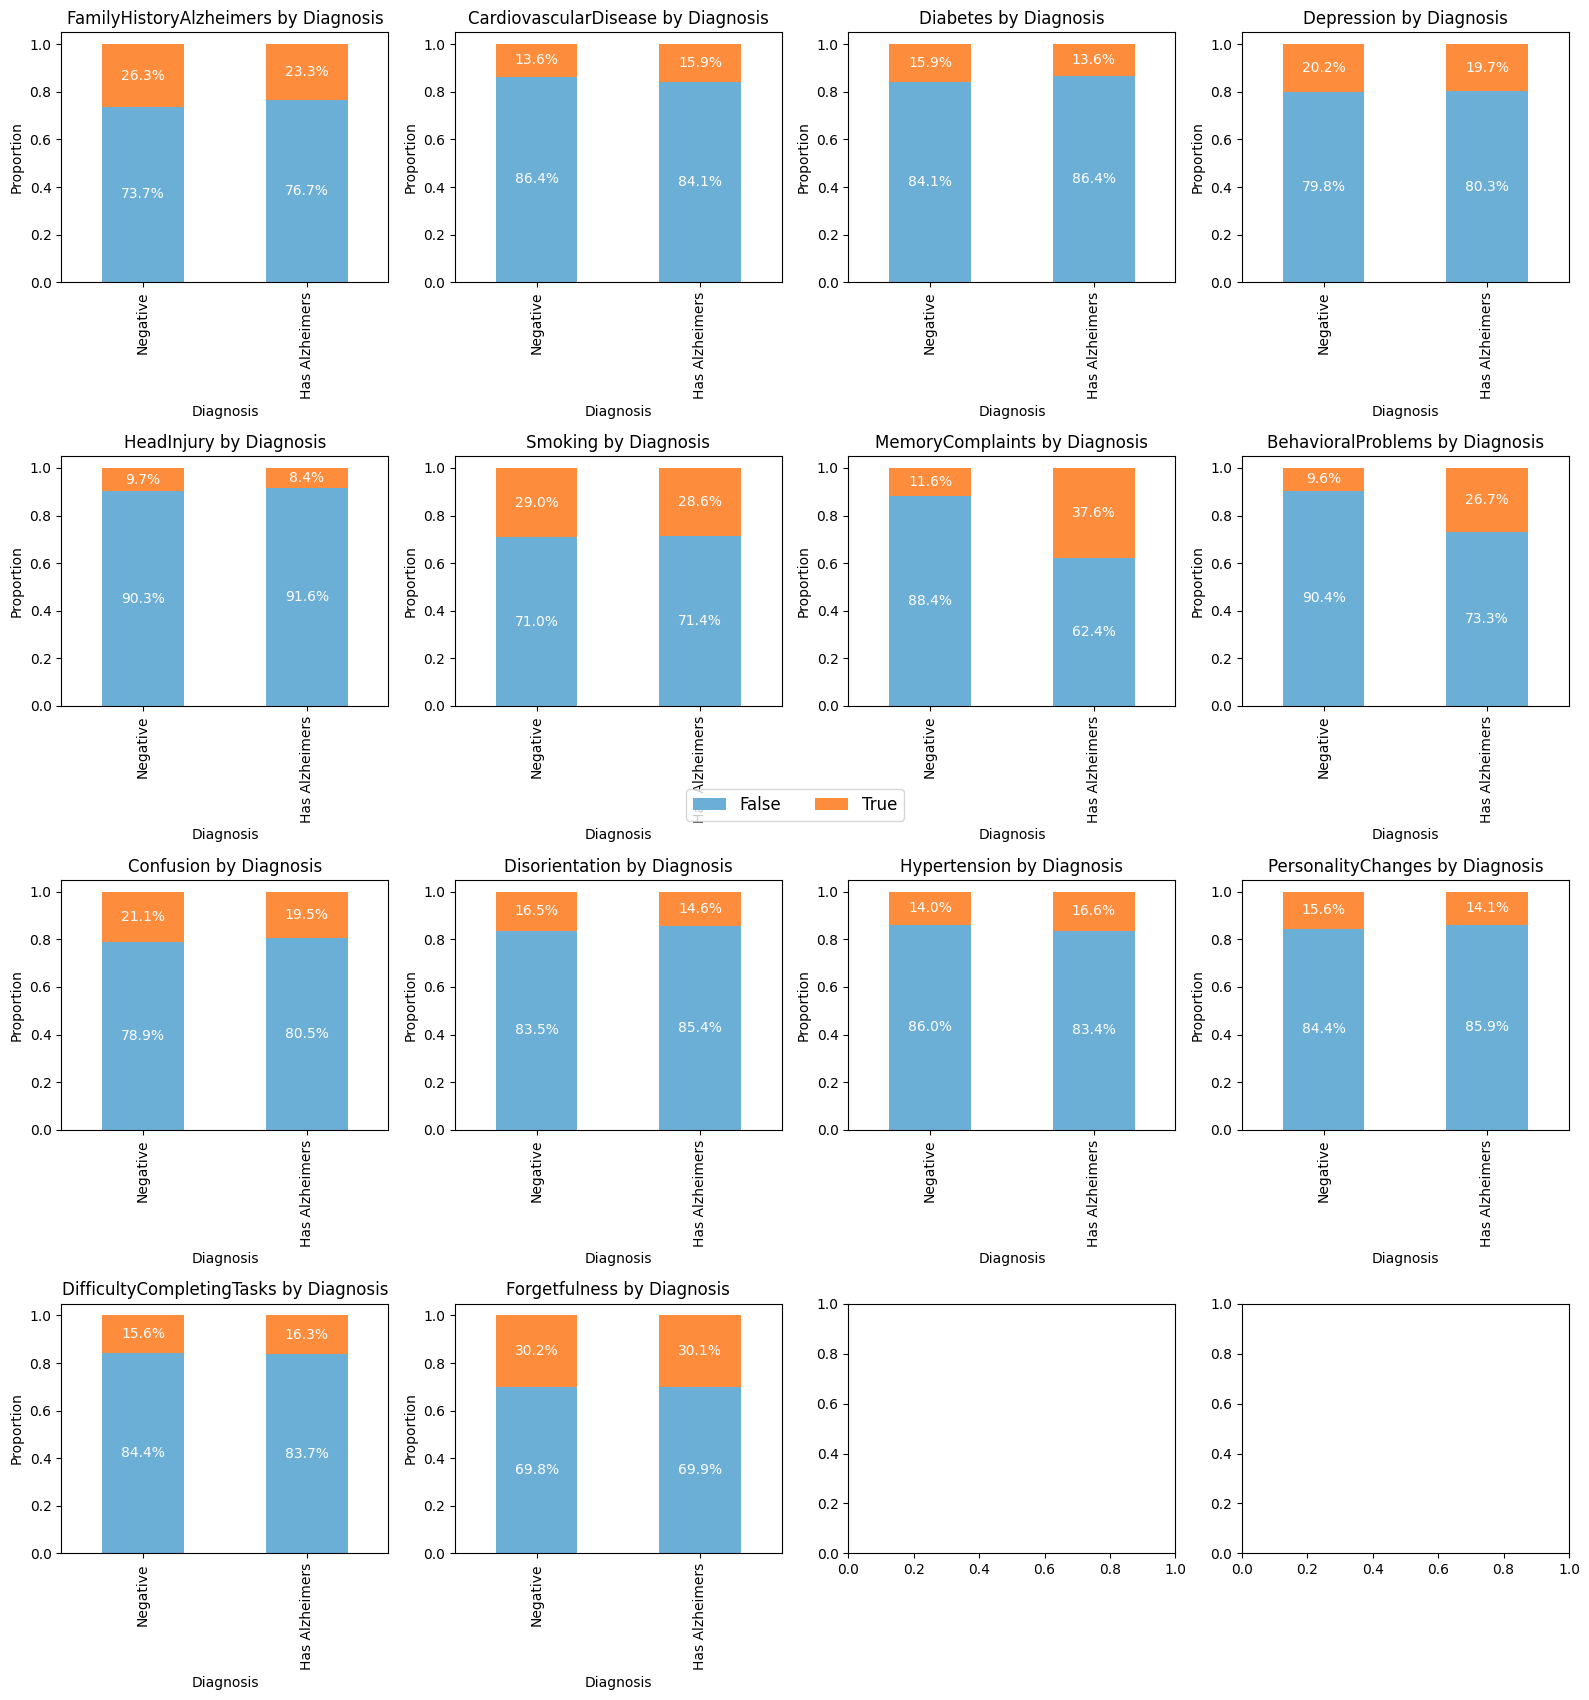

In [33]:
# Setup grid dimensions and figure
fig, axes = plt.subplots(4, 4, figsize=(16, 18))
axes = axes.flatten()

# Define custom colors
colors = ['#6BAED6', '#FD8D3C']  # Soft blue and orange

# Plot stacked bar plots for each binary categorical variable
for i, col in enumerate(categorical_vars_df.columns):
    pd.crosstab(encoded_data['Diagnosis'], encoded_data[col], normalize='index').plot(
        kind='bar', stacked=True, ax=axes[i], color=colors, legend=False
    )
    
    # Add percentages on the bars
    for p in axes[i].patches:
        axes[i].text(p.get_x() + p.get_width() / 2, p.get_y() + p.get_height() / 2, 
                     f'{p.get_height():.1%}', ha='center', va='center', color='white', fontsize=10)

    # Set title and labels
    axes[i].set_title(f'{col} by Diagnosis')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xticklabels(['Negative', 'Has Alzheimers'])

# Add a single legend
fig.legend(['False', 'True'], loc='center', bbox_to_anchor=(0.5, 0.5), ncol=2, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Visualize Encoded Categorical Variables by Diagnosis

### Radar/Spider Chart

C:\Users\yasme\AppData\Local\Temp\ipykernel_14316\2933679079.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  means = encoded_categotical_vars_df[columns].groupby(encoded_data['Diagnosis']).mean()


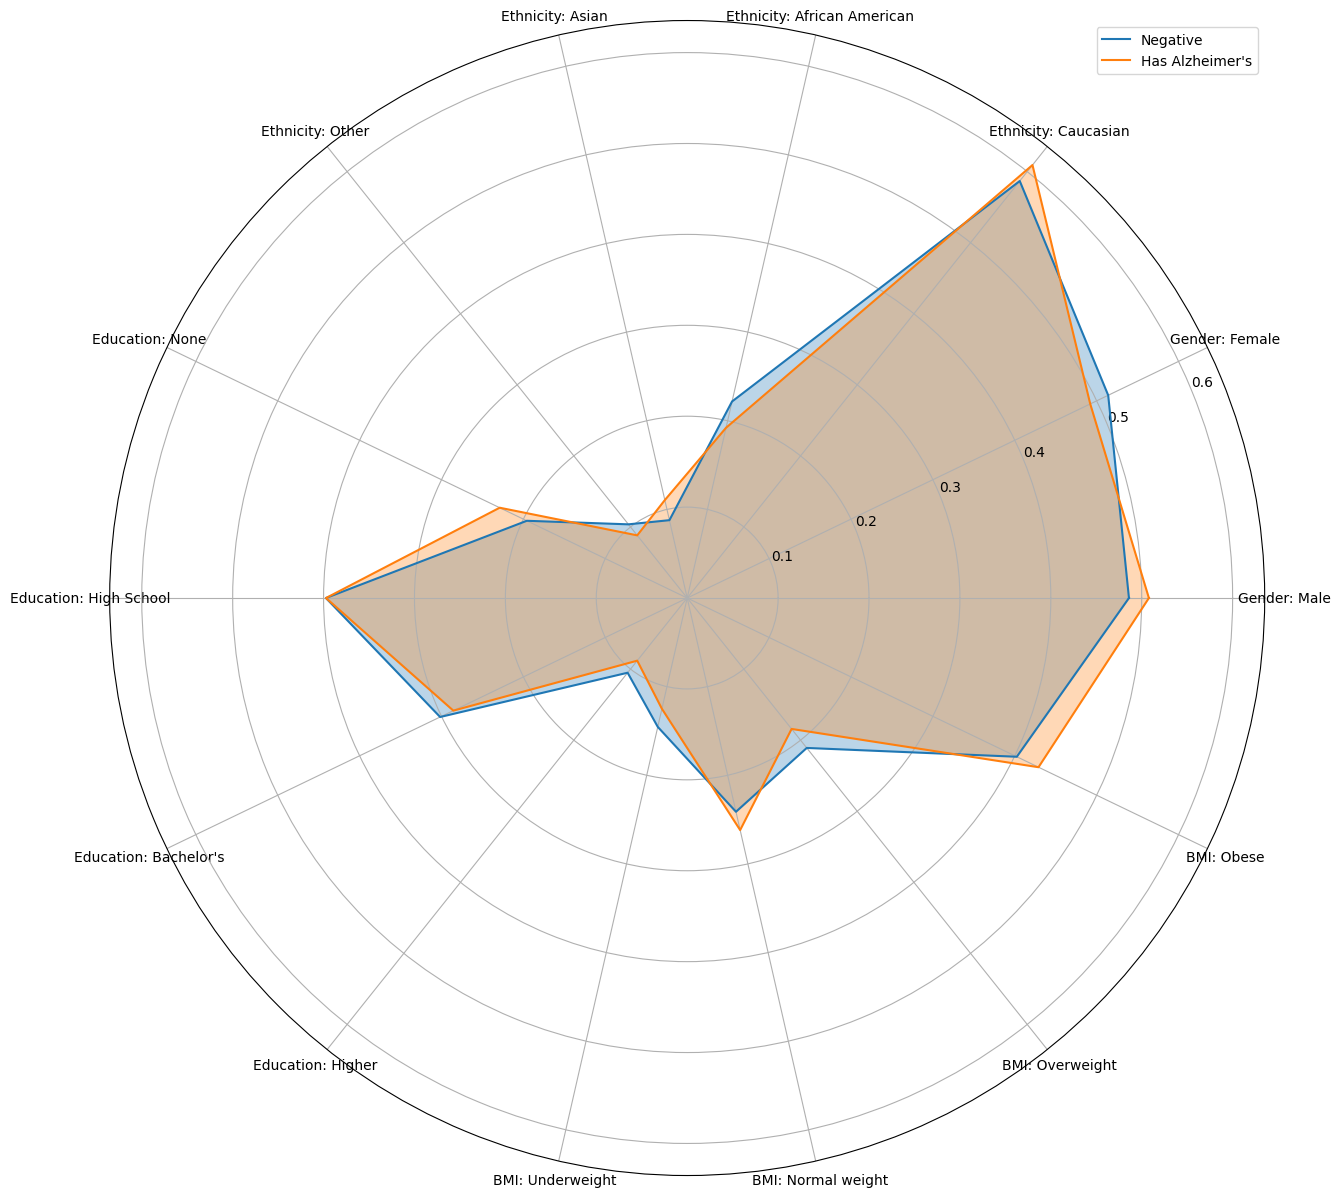

In [88]:
# I struggled with this chart T__T
# Define custom labels and relevant columns
labels = [
    'Gender: Male', 'Gender: Female', 'Ethnicity: Caucasian', 'Ethnicity: African American', 
    'Ethnicity: Asian', 'Ethnicity: Other', 'Education: None', 'Education: High School', 
    "Education: Bachelor's", 'Education: Higher',
    'BMI: Underweight', 'BMI: Normal weight', 'BMI: Overweight', 'BMI: Obese'
]

# Select the relevant columns from the encoded dataframe
columns = [
    'Gender_0', 'Gender_1', 'Ethnicity_0', 'Ethnicity_1', 
    'Ethnicity_2', 'Ethnicity_3', 'EducationLevel_0', 
    'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3',
    'BMICategory_UnderWeight', 'BMICategory_NormalWeight', 
    'BMICategory_OverWeight', 'BMICategory_Obese']

# Calculate mean values for each category (Diagnosis = 0 and 1)
means = encoded_categotical_vars_df[columns].groupby(encoded_data['Diagnosis']).mean()

# Function to plot the radar chart
def plot_radar_chart(data, labels):
    angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist() + [0]
    
    fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': 'polar'})
    
    for idx, row in data.iterrows():
        values = row.tolist() + row.tolist()[:1]
        label = 'Negative' if int(idx) == 0 else "Has Alzheimer's"
        ax.plot(angles, values, label=label)
        ax.fill(angles, values, alpha=0.3)
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    
    plt.legend(loc='upper right')
    plt.show()

# Plot the radar chart
plot_radar_chart(means, labels)

## Distribution of Continuous Variables by Diagnosis

### Plot 1

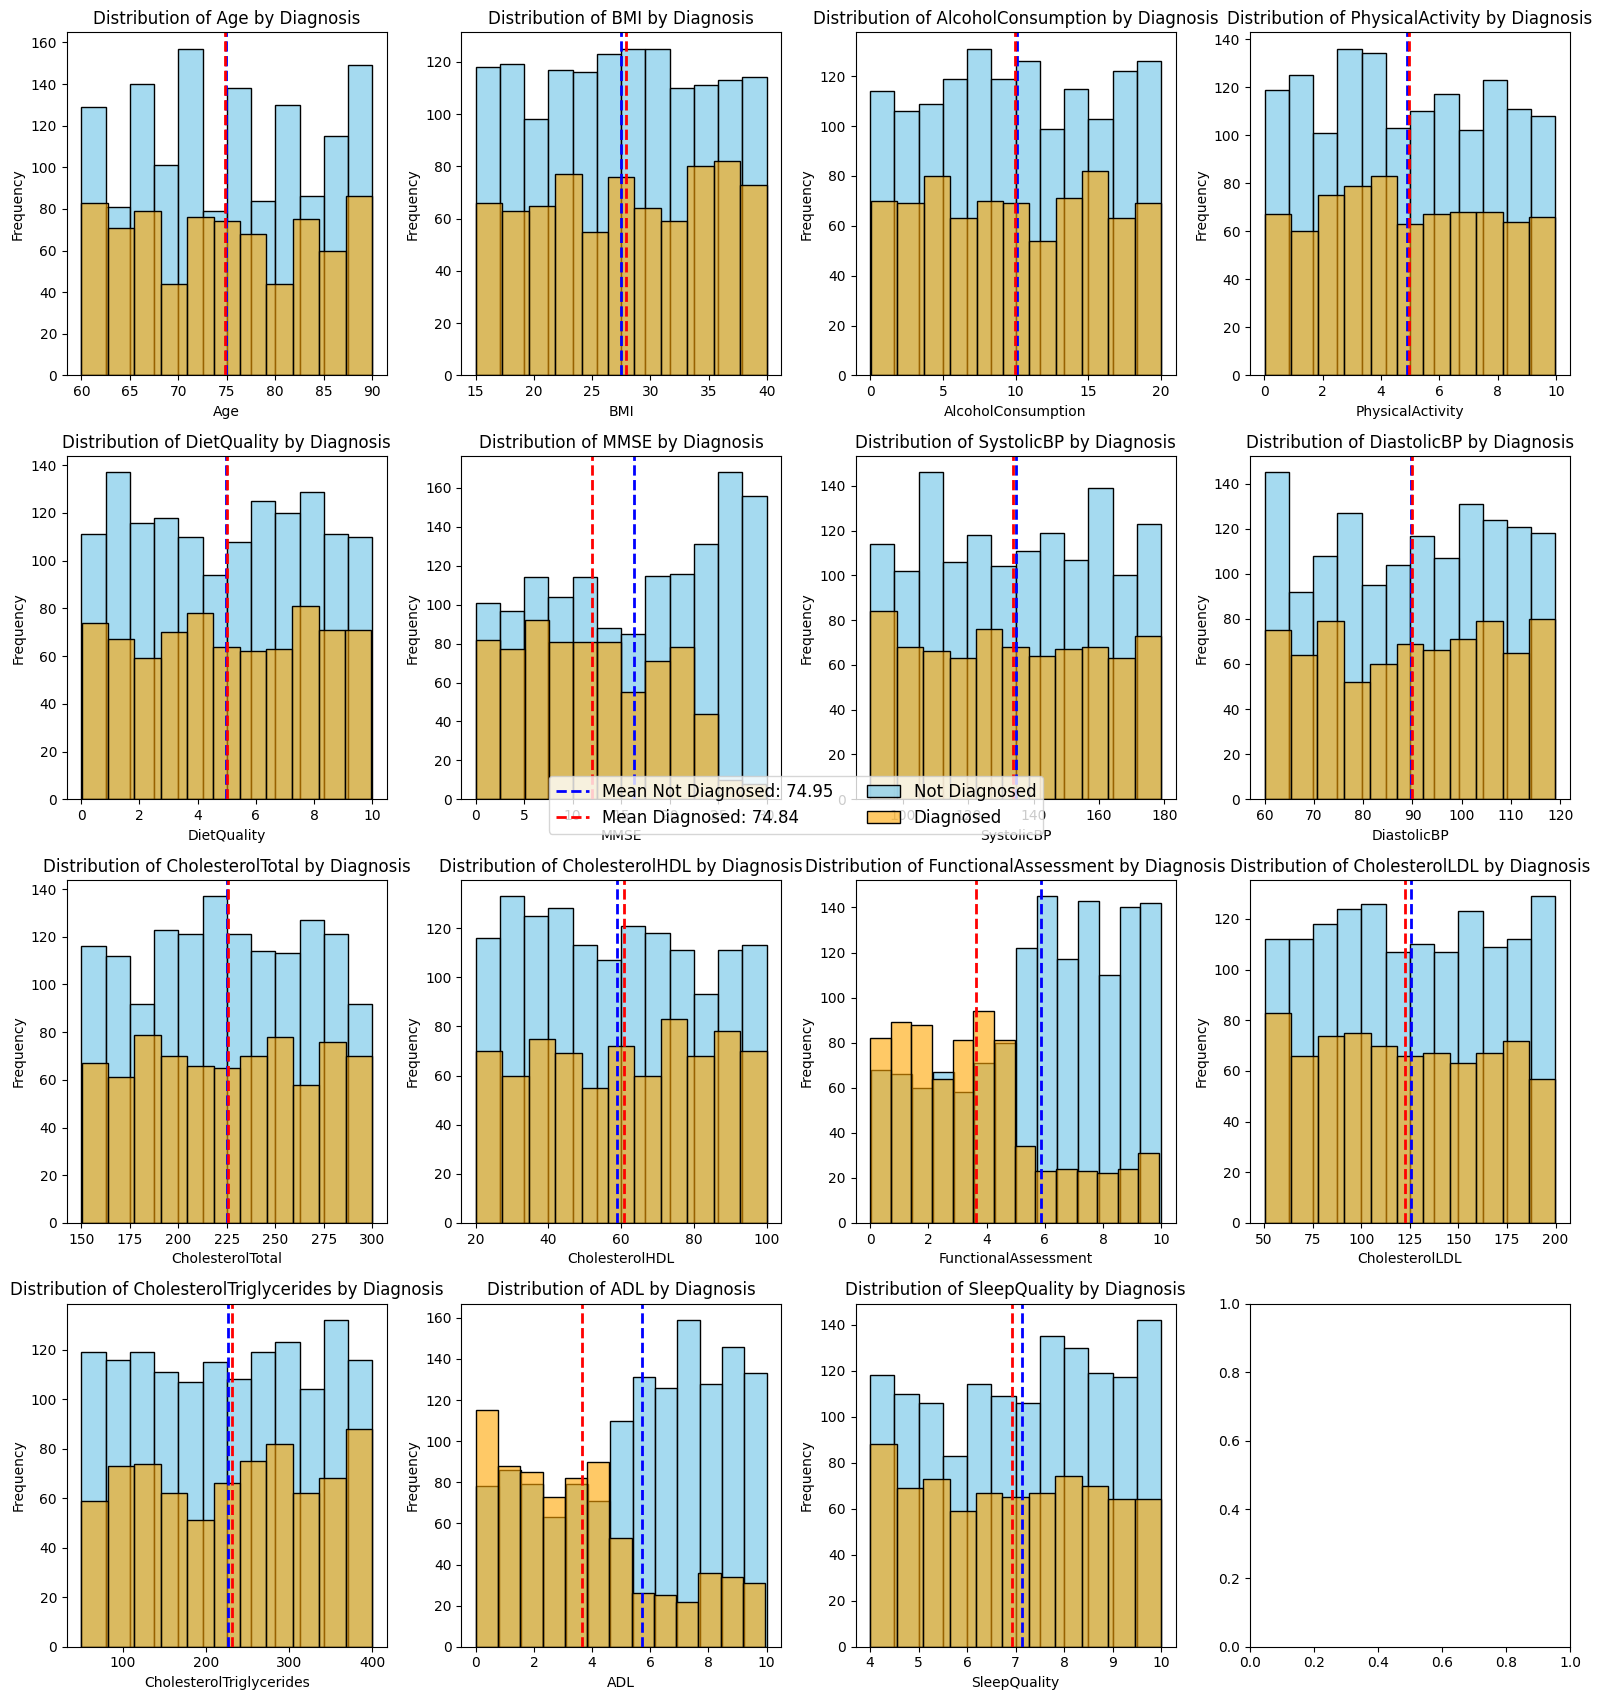

In [58]:
# Number of variables
num_vars = len(continuous_vars_df.columns)
rows = 4  # Number of rows
cols = 4  # Number of columns

# Create subplots for each continuous variable
fig, axes = plt.subplots(rows, cols, figsize=(16, 18))
axes = axes.flatten()

# Plot histograms for diagnosed and non-diagnosed groups
for i, var in enumerate(continuous_vars_df.columns):
    sns.histplot(continuous_vars_df[encoded_data['Diagnosis'] == 0][var], kde=False, ax=axes[i], color='skyblue', edgecolor='black', label='Not Diagnosed')
    sns.histplot(continuous_vars_df[encoded_data['Diagnosis'] == 1][var], kde=False, ax=axes[i], color='orange', edgecolor='black', label='Diagnosed', alpha=0.6)
    
    # Add vertical lines for the means
    mean_not_diagnosed = continuous_vars_df[encoded_data['Diagnosis'] == 0][var].mean()
    mean_diagnosed = continuous_vars_df[encoded_data['Diagnosis'] == 1][var].mean()
    
    axes[i].axvline(mean_not_diagnosed, color='blue', linestyle='--', linewidth=2, label=f'Mean Not Diagnosed: {mean_not_diagnosed:.2f}')
    axes[i].axvline(mean_diagnosed, color='red', linestyle='--', linewidth=2, label=f'Mean Diagnosed: {mean_diagnosed:.2f}')
    
    # Set the title and labels
    axes[i].set_title(f'Distribution of {var} by Diagnosis')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

# Add a single legend for all plots in the center
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center', bbox_to_anchor=(0.5, 0.5), ncol=2, fontsize=12)

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


### Plot 2

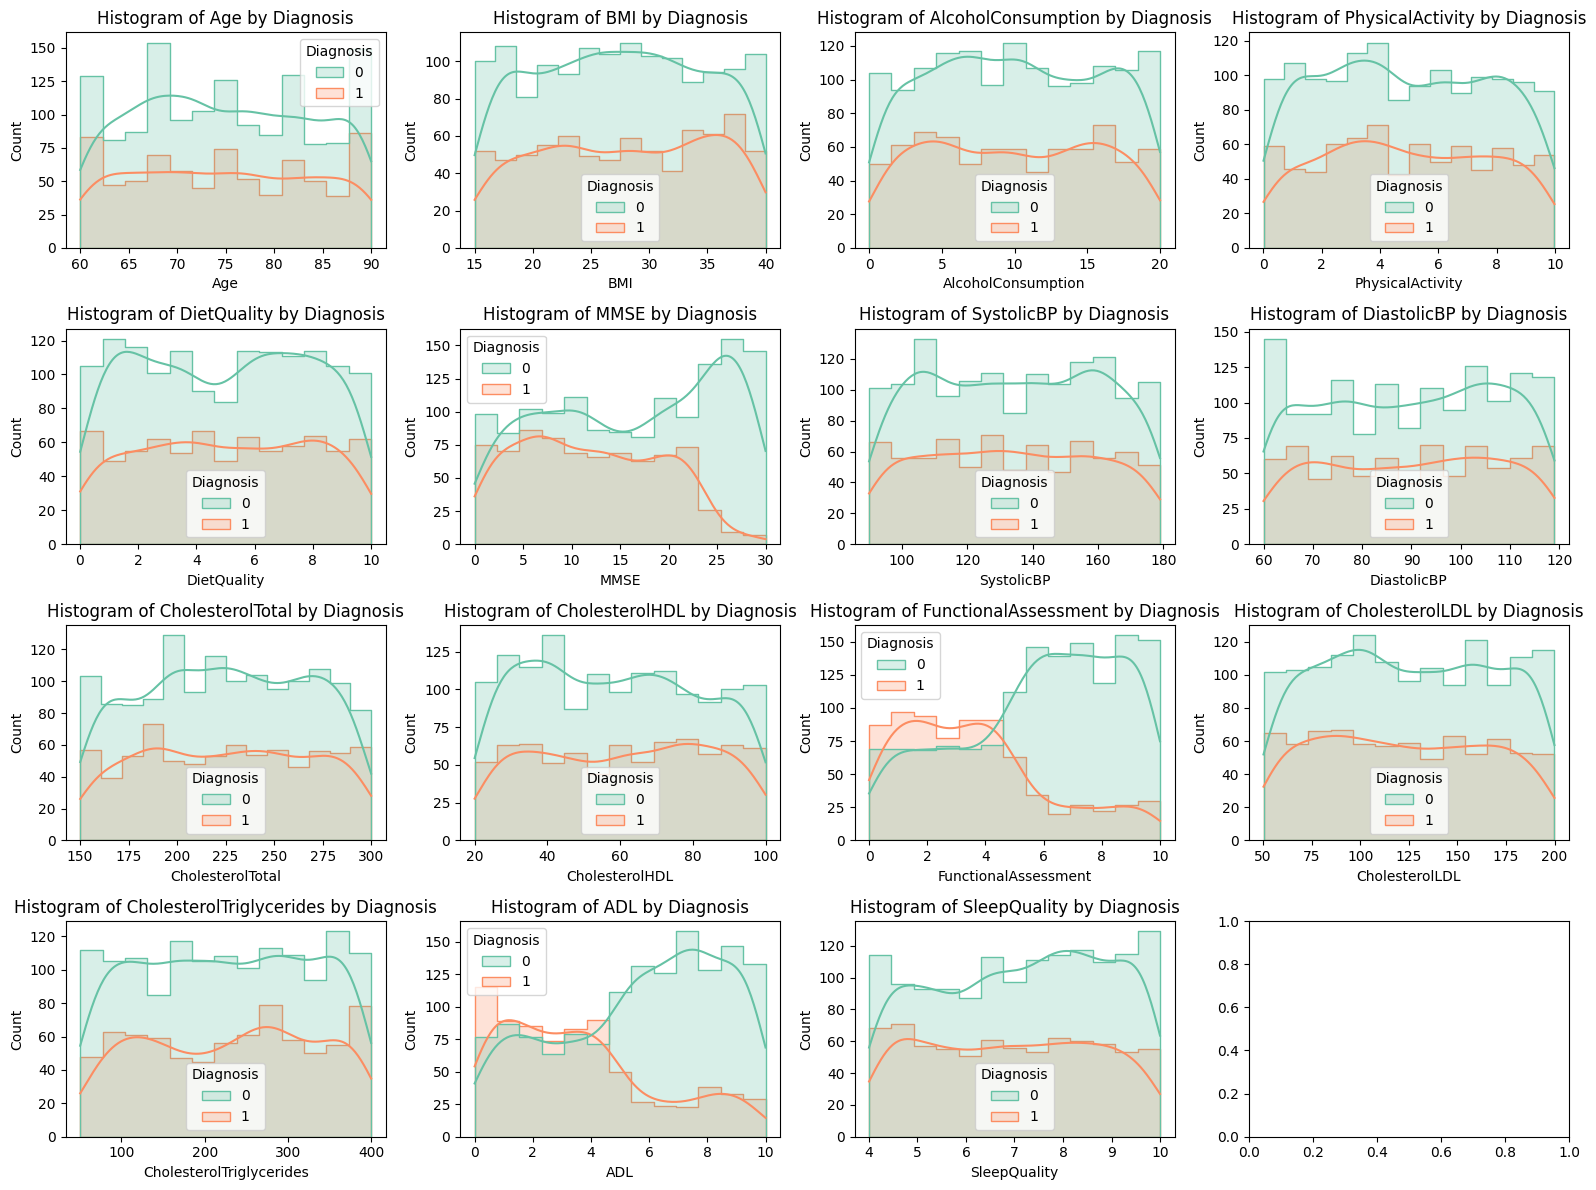

In [59]:
# Define the number of rows and columns for the grid
num_vars = len(continuous_vars_df)
rows = 4  # Adjust as needed
cols = 4  # Adjust as needed

# Plot histograms by Diagnosis
fig, axes = plt.subplots(rows, cols, figsize=(16, 12))
axes = axes.flatten()

for i, var in enumerate(continuous_vars_df):
    sns.histplot(data=encoded_data, x=var, hue='Diagnosis', kde=True, ax=axes[i], palette="Set2", element="step")
    axes[i].set_title(f'Histogram of {var} by Diagnosis')

plt.tight_layout()
plt.show()


## Countplot of Categorical Variables by Diagnosis

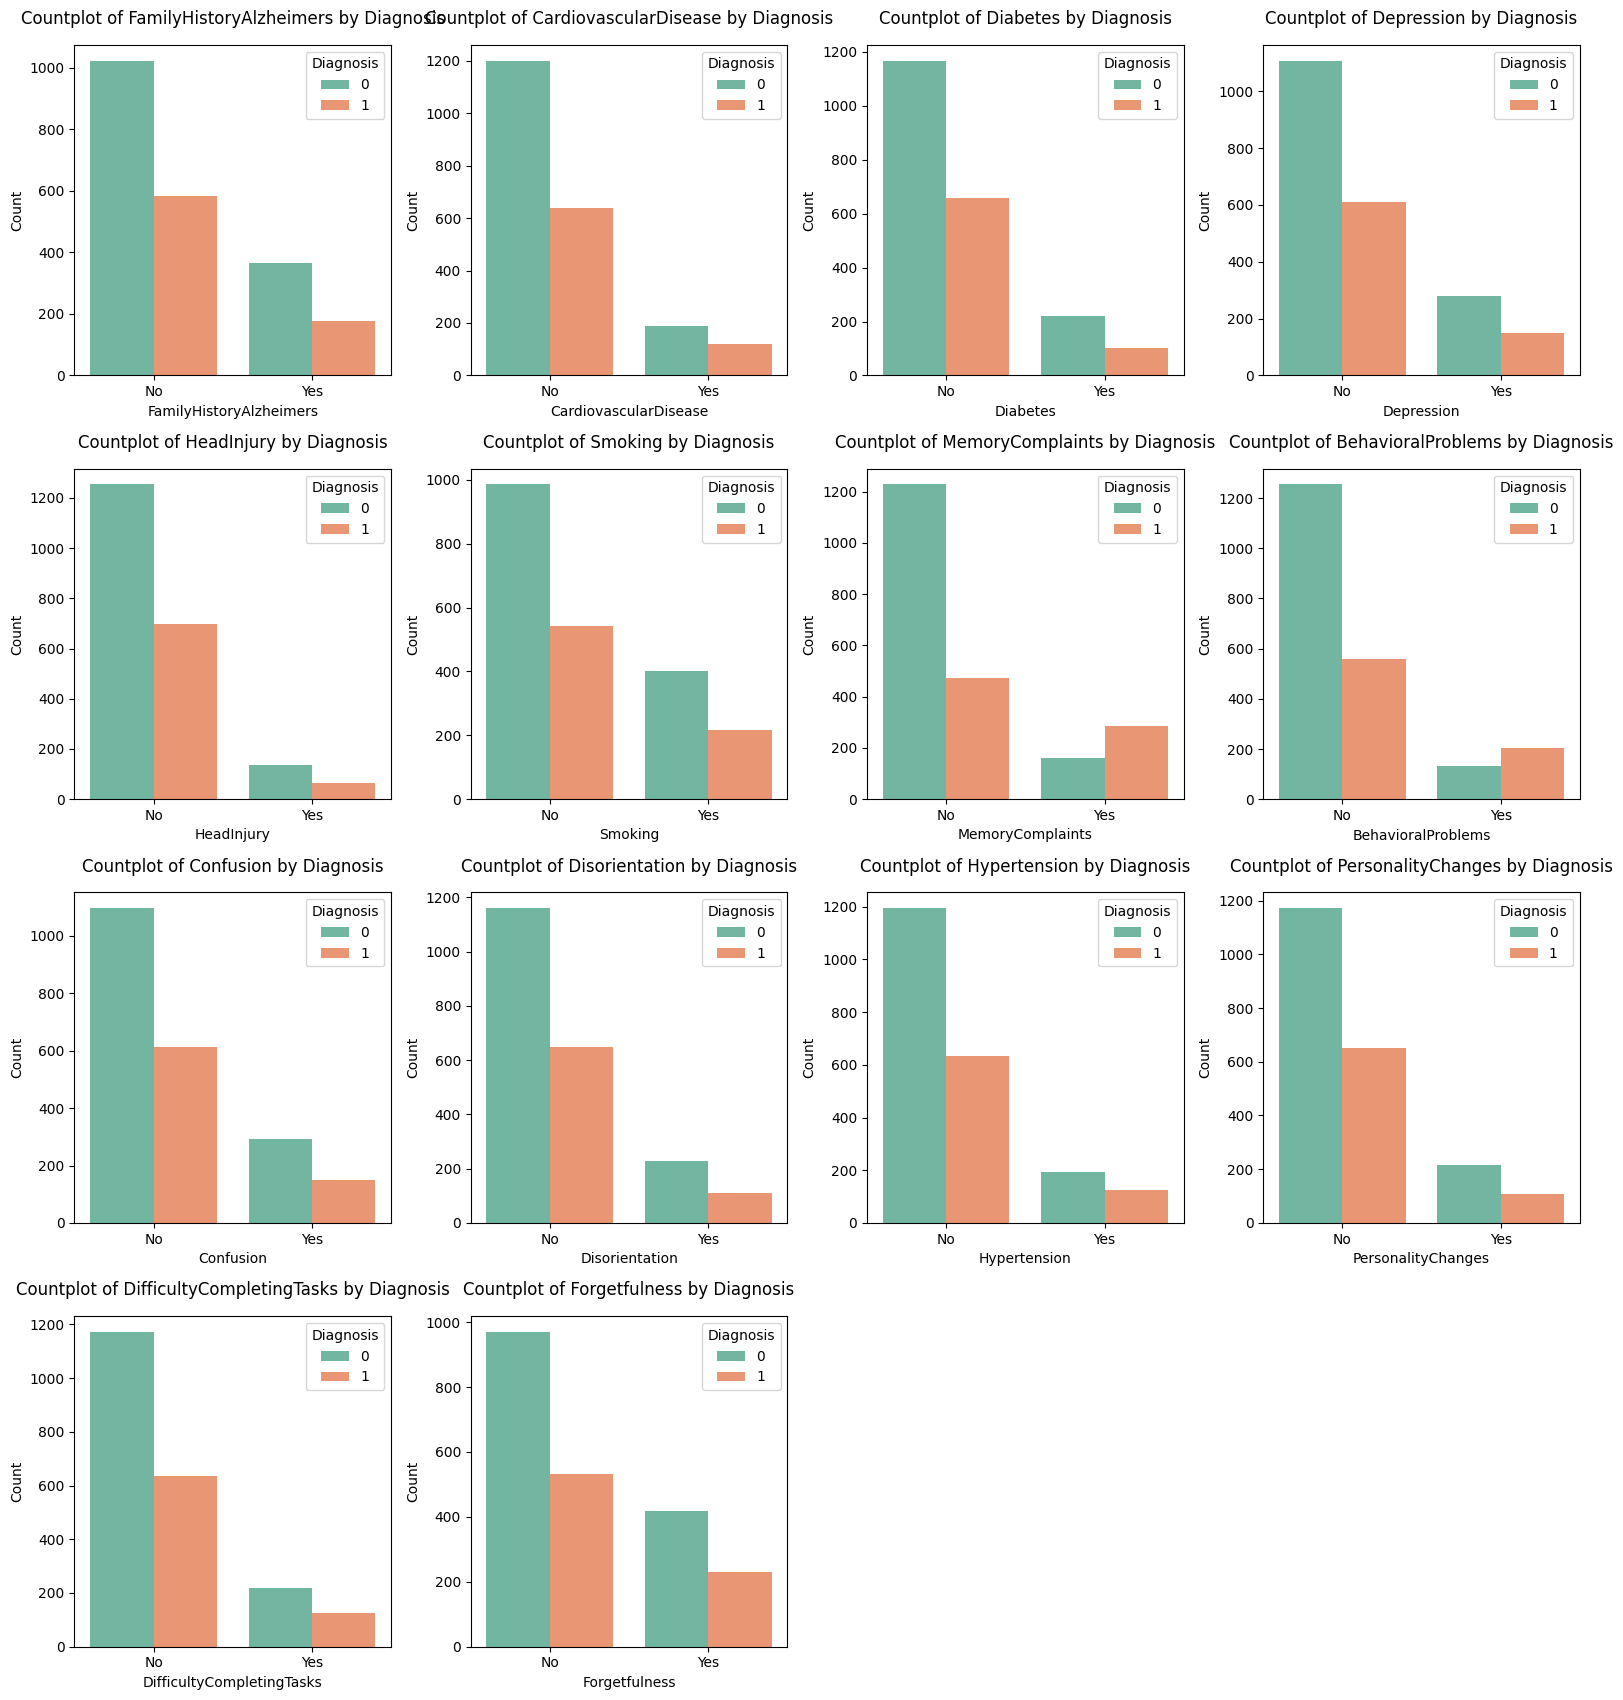

In [60]:
# Number of categorical variables
num_cat_vars = len(categorical_vars_df.columns)
cols_cat = 4  # Number of columns in the grid
rows_cat = (num_cat_vars + cols_cat - 1) // cols_cat  # Calculate rows required for categorical variables

# Create subplots for each categorical variable
fig_cat, axes_cat = plt.subplots(rows_cat, cols_cat, figsize=(16, 18))
axes_cat = axes_cat.flatten()

# Plot count plots for each categorical variable
for i, col in enumerate(categorical_vars_df.columns):
    sns.countplot(x=categorical_vars_df[col], hue=encoded_data['Diagnosis'], palette='Set2', ax=axes_cat[i])
    axes_cat[i].set_title(f'Countplot of {col} by Diagnosis', pad=15)
    axes_cat[i].set_xlabel(col)
    axes_cat[i].set_ylabel('Count')
    
    # Set custom x-tick labels for "No" (0) and "Yes" (1)
    axes_cat[i].set_xticks([0, 1])
    axes_cat[i].set_xticklabels(['No', 'Yes'])

# Remove any empty subplots (if the grid is larger than the number of variables)
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


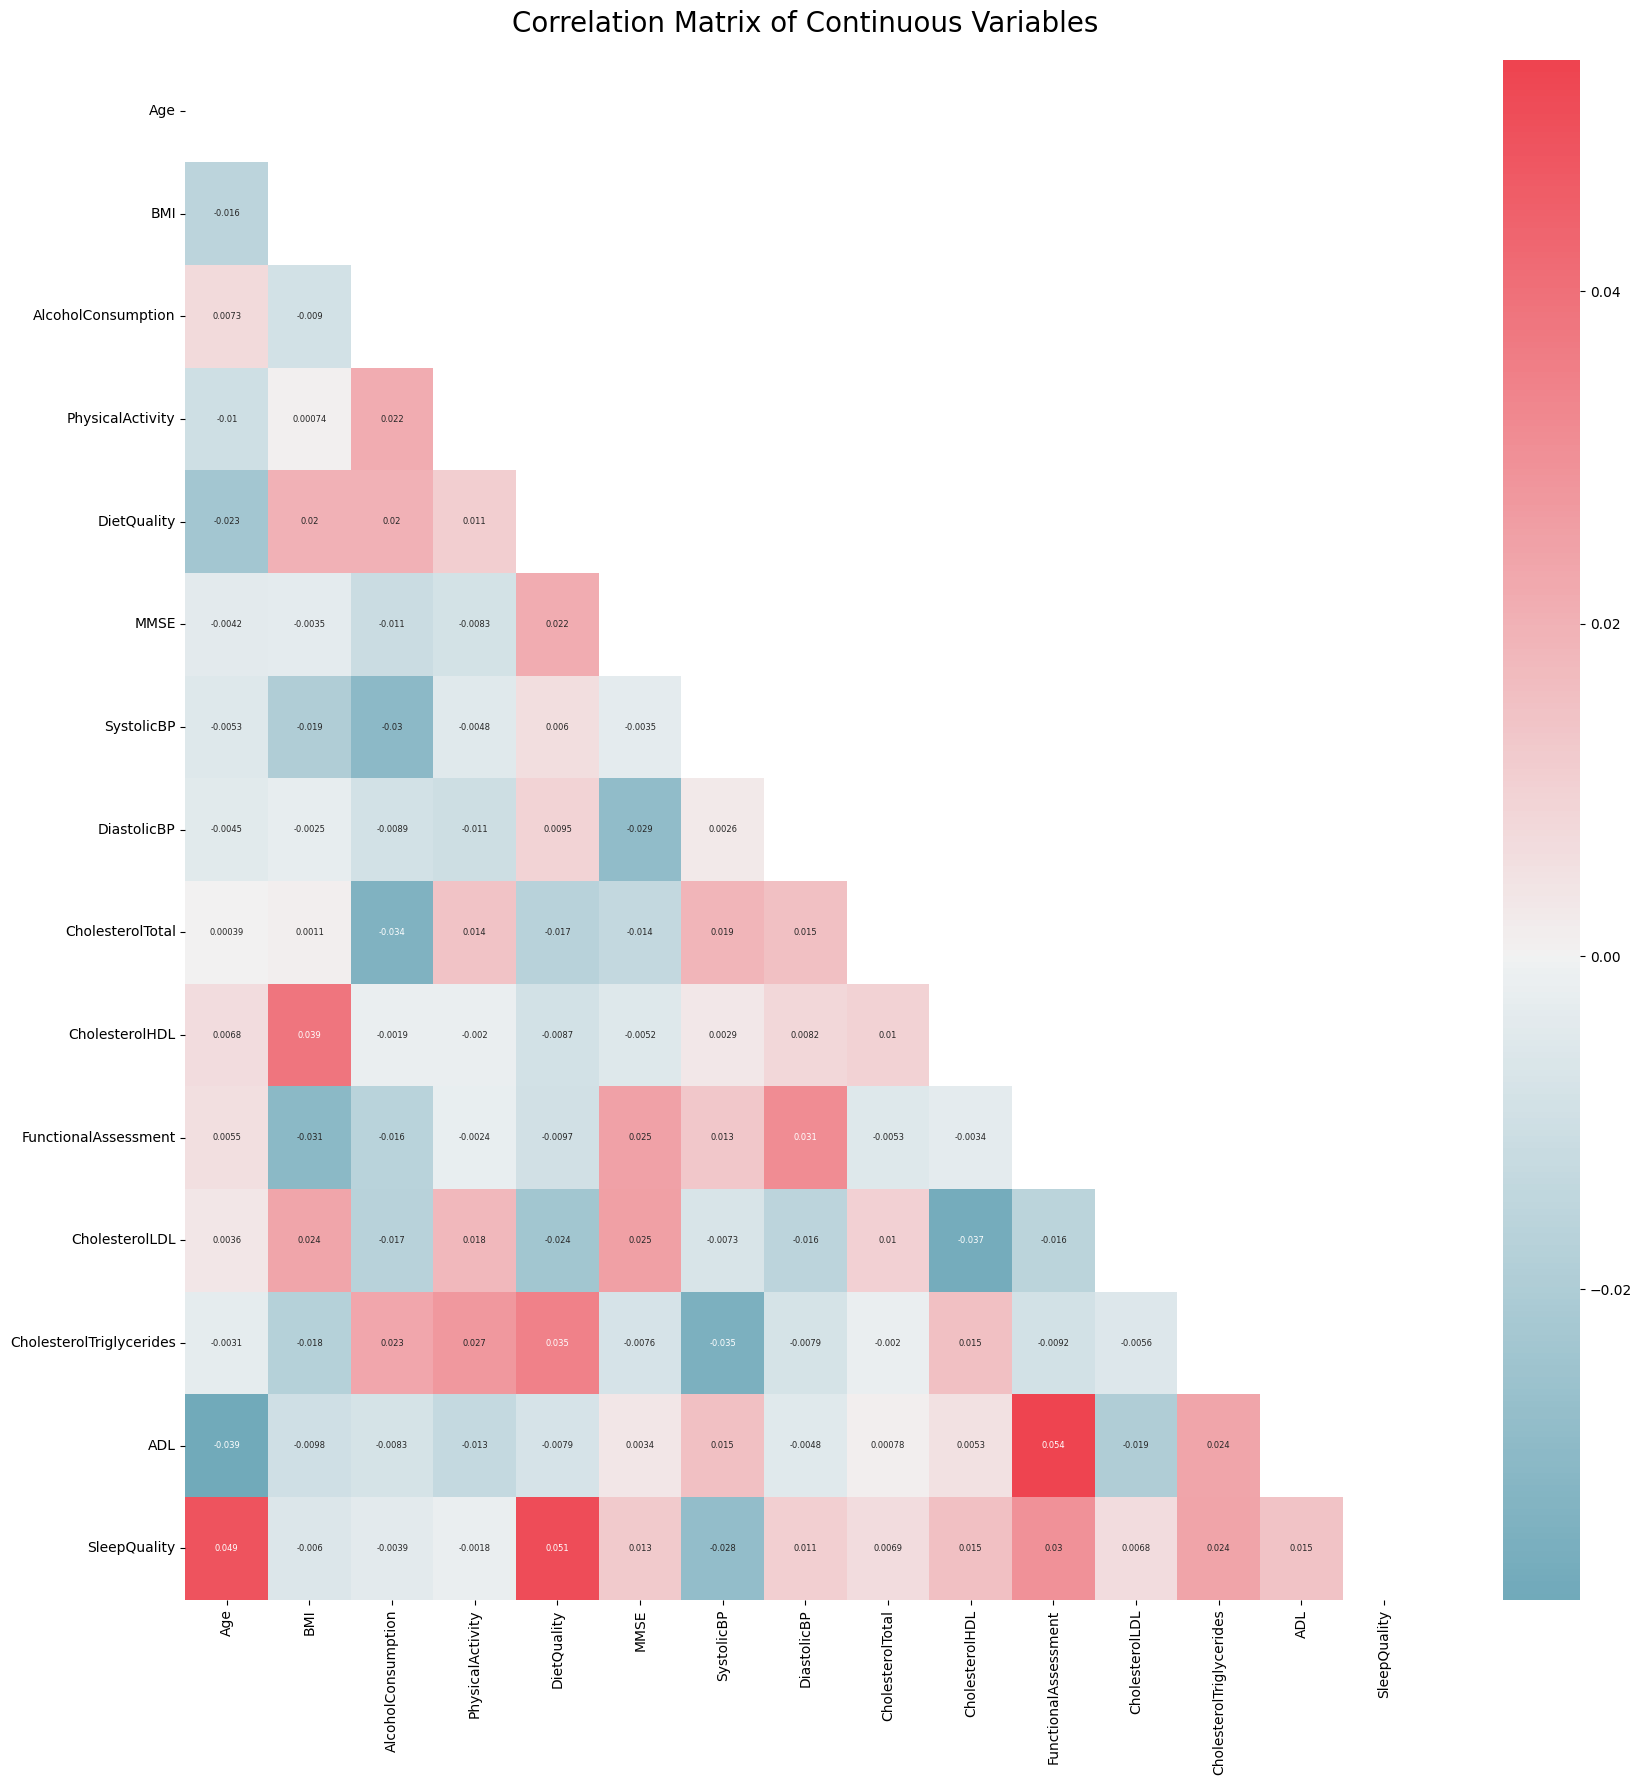

In [61]:
# In this case I experimented using Pearson corr test with all the vartiables and generated correlation heatmap

# Compute the correlation matrix for continuous variables
corrmat = continuous_vars_df.corr()

# Create a mask for the upper triangle for better readability
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

# Create a custom diverging color palette with reversed hues
custom_palette = sns.diverging_palette(220, 10, s=80, l=55, n=9, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat,
            annot=True, annot_kws={'fontsize':6},
            mask=mask,  # Apply the mask to hide the upper triangle
            cmap=custom_palette,  # Apply the custom color palette
            center=0)  # Center the colormap at 0

# Add a title to the heatmap
plt.title('Correlation Matrix of Continuous Variables', fontsize=20, pad=20)

plt.show()


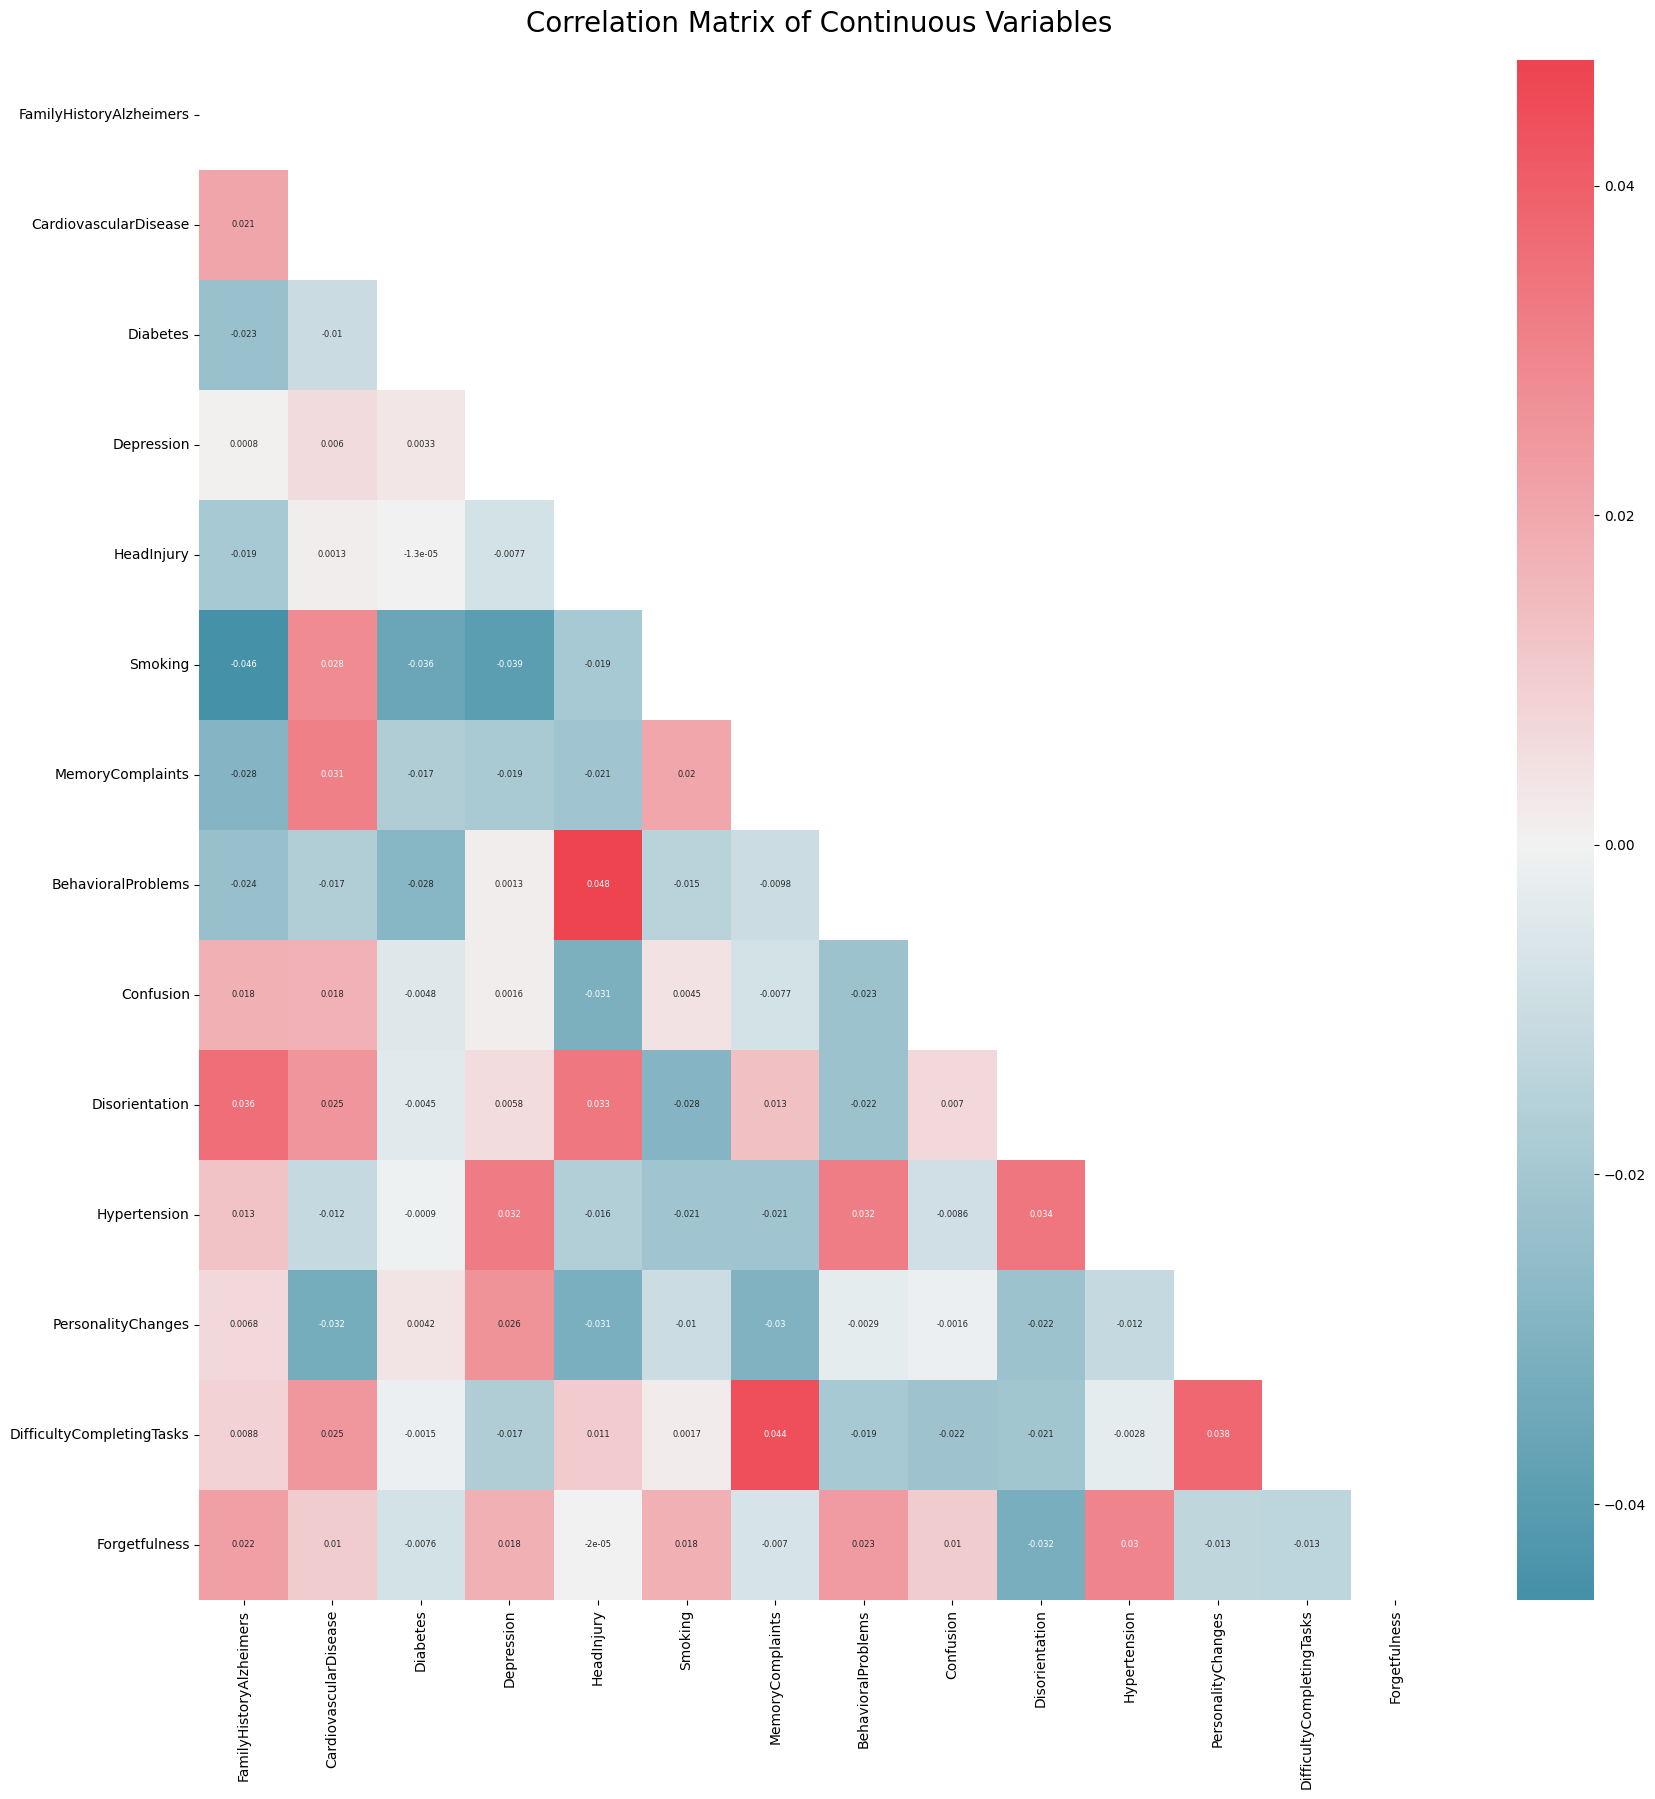

In [62]:
# Compute the correlation matrix for continuous variables
corrmat = categorical_vars_df.corr()

# Create a mask for the upper triangle for better readability
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

# Create a custom diverging color palette with reversed hues
custom_palette = sns.diverging_palette(220, 10, s=80, l=55, n=9, as_cmap=True)

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corrmat,
            annot=True, annot_kws={'fontsize':6},
            mask=mask,  # Apply the mask to hide the upper triangle
            cmap=custom_palette,  # Apply the custom color palette
            center=0)  # Center the colormap at 0

# Add a title to the heatmap
plt.title('Correlation Matrix of Continuous Variables', fontsize=20, pad=20)

plt.show()


## Checking Data Normality for Continuous Data

In [63]:
# Perform Shapiro-Wilk test for normality check
for var in continuous_vars_df:
    data_var = continuous_vars_df[var].dropna()
    
    if len(data_var) > 3:  # Shapiro-Wilk requires at least 3 data points
        stat, p_value = shapiro(data_var)
        print(f'Variable: {var}')
        print(f'Statistic: {stat:.4f}, p-value: {p_value:.4f}')
        
        if p_value > 0.05:
            print('Data is normally distributed (fail to reject H0)')
        else:
            print('Data is not normally distributed (reject H0)')
        print('---')
 

Variable: Age
Statistic: 0.9523, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: BMI
Statistic: 0.9558, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: AlcoholConsumption
Statistic: 0.9545, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: PhysicalActivity
Statistic: 0.9567, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: DietQuality
Statistic: 0.9522, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: MMSE
Statistic: 0.9525, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: SystolicBP
Statistic: 0.9551, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: DiastolicBP
Statistic: 0.9494, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: CholesterolTotal
Statistic: 0.9590, p-value: 0.0000
Data is not normally distributed (reject H0)
---
Variable: CholesterolHDL
Statistic: 0.9527, p-value: 

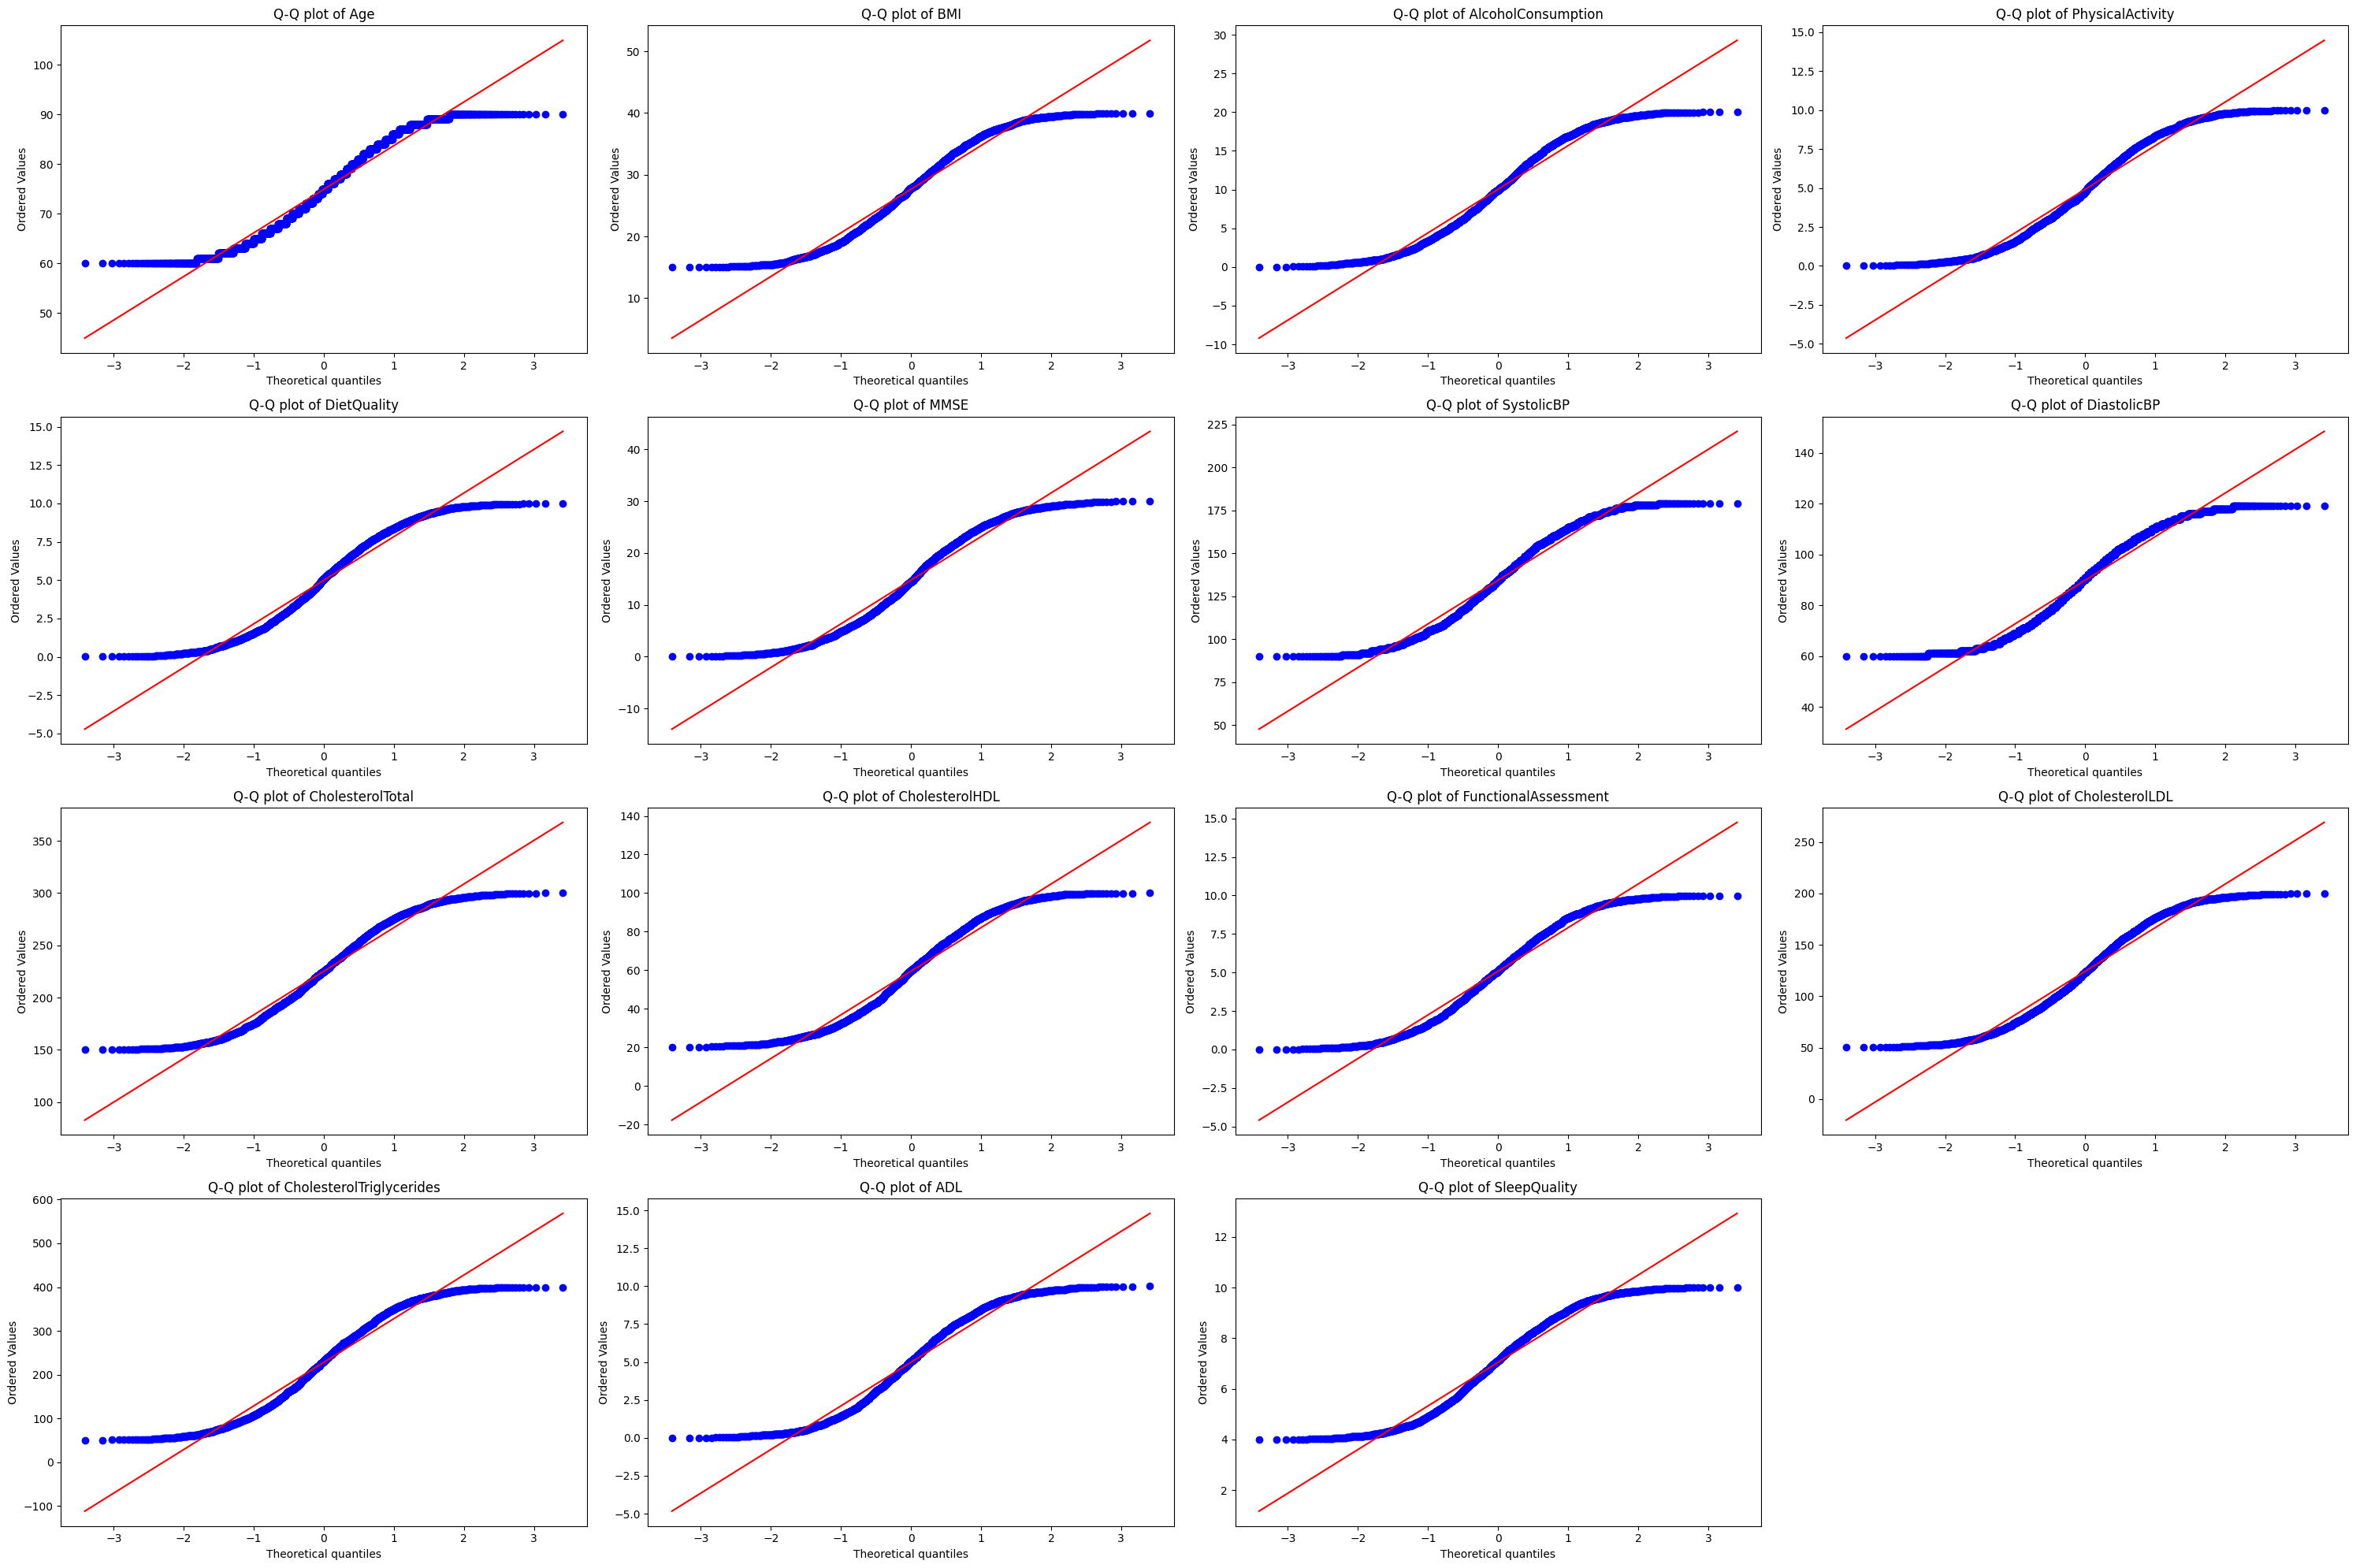

In [64]:
# Define the number of rows and columns in the grid
rows = 4  # Adjust according to the number of variables
cols = 4  # Adjust according to the number of variables

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(30, 20))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each continuous variable (excluding 'Diagnosis') and create a Q-Q plot
for i, var in enumerate(continuous_vars_df.columns):
    if var != 'Diagnosis':  # Exclude the 'Diagnosis' column
        stats.probplot(continuous_vars_df[var], dist="norm", plot=axes[i])
        axes[i].set_title(f'Q-Q plot of {var}')

# Remove any empty subplots (if the number of variables doesn't fill the grid)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


## Statistical Analysis

| **Data Type**               | **Normality**          | **Statistical Techniques**                                                                                       |
|-----------------------------|------------------------|-------------------------------------------------------------------------------------------------------------------|
| **Continuous Data**          | **Normal**             | T-tests, ANOVA, Pearson Correlation, Linear Regression                                                            |
|                             | **Not Normal**         | Mann-Whitney U Test, Kruskal-Wallis Test, Spearman Correlation, Non-Parametric Regression                         |
| **Categorical Data**         | N/A                    | Chi-Square Test, Fisher’s Exact Test, Logistic Regression, Cross Tabulation, Frequency Analysis                   |
| **Encoded Categorical Data** | N/A                    | Logistic Regression, Chi-Square Test, Cluster Analysis, PCA                                                       |


In [65]:
stats_continuous_vars_df = pd.DataFrame(encoded_data, columns=['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'MMSE', 
                   'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolHDL', 'FunctionalAssessment',
                   'CholesterolLDL', 'CholesterolTriglycerides', 'ADL', 'SleepQuality', 'Diagnosis'])

stats_categorical_vars_df = pd.DataFrame(encoded_data, columns=['FamilyHistoryAlzheimers', 'CardiovascularDisease',
                           'Diabetes', 'Depression', 'HeadInjury',
                           'Smoking', 'MemoryComplaints', 'BehavioralProblems', 'Confusion', 'Disorientation', 'Hypertension',
                           'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'])

stats_encoded_categotical_vars_df = pd.DataFrame(encoded_data, columns=['Gender_0', 'Gender_1', 'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3',
                           'EducationLevel_0', 'EducationLevel_1', 'EducationLevel_2', 'EducationLevel_3', 'BMICategory_UnderWeight', 'BMICategory_NormalWeight', 'BMICategory_OverWeight', 'BMICategory_Obese', 'Diagnosis'])

In [66]:
# Convert all columns in stats_encoded_categotical_vars_df to 'category' dtype
stats_encoded_categotical_vars_df = stats_encoded_categotical_vars_df.astype('int64')

# Verify
stats_encoded_categotical_vars_df.dtypes


Gender_0                    int64
Gender_1                    int64
Ethnicity_0                 int64
Ethnicity_1                 int64
Ethnicity_2                 int64
Ethnicity_3                 int64
EducationLevel_0            int64
EducationLevel_1            int64
EducationLevel_2            int64
EducationLevel_3            int64
BMICategory_UnderWeight     int64
BMICategory_NormalWeight    int64
BMICategory_OverWeight      int64
BMICategory_Obese           int64
Diagnosis                   int64
dtype: object

## Statistical Analysis on Continuous Data

### Mann-Whitney U Test

Mann-Whitney U Test for Age: Statistics=531471.000, p=0.791
No significant difference between groups for Age (fail to reject H0)
--------------------------------------------------
Mann-Whitney U Test for BMI: Statistics=510992.000, p=0.221
No significant difference between groups for BMI (fail to reject H0)
--------------------------------------------------
Mann-Whitney U Test for AlcoholConsumption: Statistics=533321.000, p=0.689
No significant difference between groups for AlcoholConsumption (fail to reject H0)
--------------------------------------------------
Mann-Whitney U Test for PhysicalActivity: Statistics=524081.000, p=0.786
No significant difference between groups for PhysicalActivity (fail to reject H0)
--------------------------------------------------
Mann-Whitney U Test for DietQuality: Statistics=522294.000, p=0.688
No significant difference between groups for DietQuality (fail to reject H0)
--------------------------------------------------
Mann-Whitney U Test for MMSE

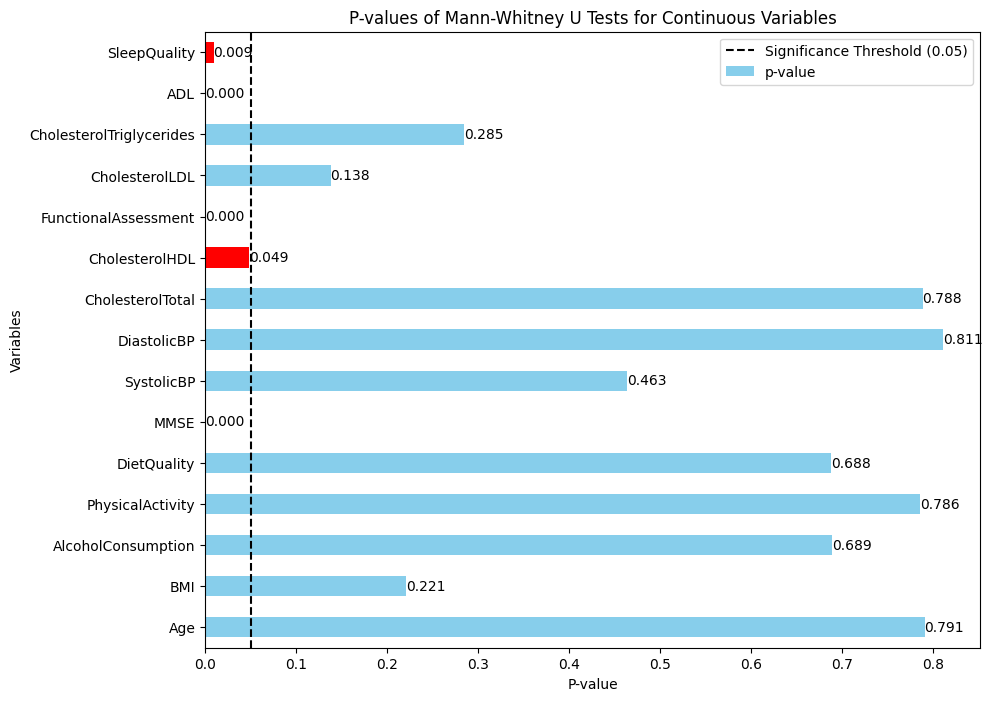

In [67]:
# Initialize a dictionary to store the test results
mw_results = {}

# Perform Mann-Whitney U test for each continuous variable
for col in continuous_vars_df.columns:
    # Extract the two groups based on the Diagnosis
    group1 = stats_continuous_vars_df[encoded_data['Diagnosis'] == 0][col].dropna()
    group2 = stats_continuous_vars_df[encoded_data['Diagnosis'] == 1][col].dropna()
    
    # Perform the Mann-Whitney U test
    stat, p = stats.mannwhitneyu(group1, group2)
    
    # Store the results in the dictionary
    mw_results[col] = p
    
    # Print the results
    print(f'Mann-Whitney U Test for {col}: Statistics={stat:.3f}, p={p:.3f}')
    if p < 0.05:
        print(f'Significant difference between groups for {col} (reject H0)')
    else:
        print(f'No significant difference between groups for {col} (fail to reject H0)')
    print('-' * 50)

# Convert the results to a DataFrame for easier plotting
mw_results_df = pd.DataFrame.from_dict(mw_results, orient='index', columns=['p-value'])

# Plot the p-values
plt.figure(figsize=(10, 8))
bars = mw_results_df['p-value'].plot(kind='barh', color=mw_results_df['p-value'].apply(lambda x: 'red' if x < 0.05 else 'skyblue'))

plt.axvline(0.05, color='black', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values of Mann-Whitney U Tests for Continuous Variables')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.legend()

# Add p-value annotations next to each bar
for index, value in enumerate(mw_results_df['p-value']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

plt.show()


### Kruskal-Wallis Test

Kruskal-Wallis Test for Age: Statistics=0.071, p=0.791
No significant difference between groups for Age (fail to reject H0)
--------------------------------------------------
Kruskal-Wallis Test for BMI: Statistics=1.497, p=0.221
No significant difference between groups for BMI (fail to reject H0)
--------------------------------------------------
Kruskal-Wallis Test for AlcoholConsumption: Statistics=0.160, p=0.689
No significant difference between groups for AlcoholConsumption (fail to reject H0)
--------------------------------------------------
Kruskal-Wallis Test for PhysicalActivity: Statistics=0.074, p=0.786
No significant difference between groups for PhysicalActivity (fail to reject H0)
--------------------------------------------------
Kruskal-Wallis Test for DietQuality: Statistics=0.161, p=0.688
No significant difference between groups for DietQuality (fail to reject H0)
--------------------------------------------------
Kruskal-Wallis Test for MMSE: Statistics=119.910, p=0

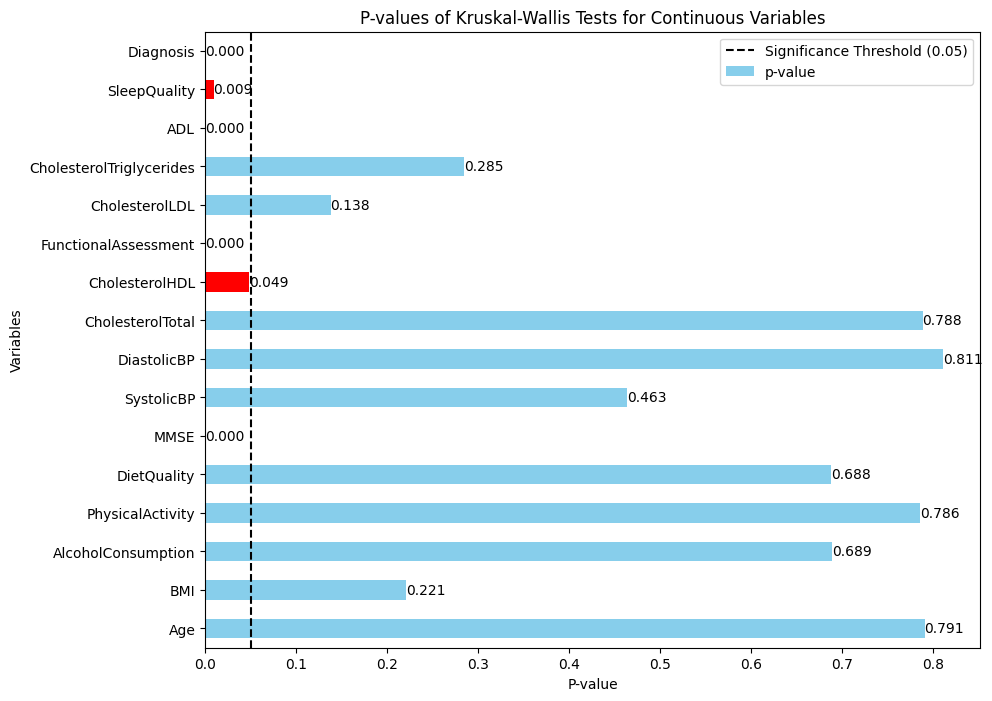

In [68]:
# Initialize a dictionary to store the test results
kw_results = {}

# Perform Kruskal-Wallis test for each continuous variable
for col in stats_continuous_vars_df.columns:
    # Extract the groups based on the Diagnosis
    groups = []
    for value in encoded_data['Diagnosis'].unique():
        group = stats_continuous_vars_df[encoded_data['Diagnosis'] == value][col]
        groups.append(group.dropna())
    
    # Perform the Kruskal-Wallis test
    stat, p = stats.kruskal(*groups)
    
    # Store the results in the dictionary
    kw_results[col] = p
    
    # Print the results
    print(f'Kruskal-Wallis Test for {col}: Statistics={stat:.3f}, p={p:.3f}')
    if p < 0.05:
        print(f'Significant difference between groups for {col} (reject H0)')
    else:
        print(f'No significant difference between groups for {col} (fail to reject H0)')
    print('-' * 50)

# Convert the results to a DataFrame for easier plotting
kw_results_df = pd.DataFrame.from_dict(kw_results, orient='index', columns=['p-value'])

# Plot the p-values
plt.figure(figsize=(10, 8))
bars = kw_results_df['p-value'].plot(kind='barh', color=kw_results_df['p-value'].apply(lambda x: 'red' if x < 0.05 else 'skyblue'))

plt.axvline(0.05, color='black', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values of Kruskal-Wallis Tests for Continuous Variables')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.legend()

# Add p-value annotations next to each bar
for index, value in enumerate(kw_results_df['p-value']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

plt.show()


### Spearman Rank Correlation

Spearman Rank Correlation for Age with Diagnosis: Correlation=-0.006, p=0.791
Spearman Rank Correlation for BMI with Diagnosis: Correlation=0.026, p=0.221
Spearman Rank Correlation for AlcoholConsumption with Diagnosis: Correlation=-0.009, p=0.689
Spearman Rank Correlation for PhysicalActivity with Diagnosis: Correlation=0.006, p=0.786
Spearman Rank Correlation for DietQuality with Diagnosis: Correlation=0.009, p=0.688
Spearman Rank Correlation for MMSE with Diagnosis: Correlation=-0.236, p=0.000
Spearman Rank Correlation for SystolicBP with Diagnosis: Correlation=-0.016, p=0.464
Spearman Rank Correlation for DiastolicBP with Diagnosis: Correlation=0.005, p=0.811
Spearman Rank Correlation for CholesterolTotal with Diagnosis: Correlation=0.006, p=0.788
Spearman Rank Correlation for CholesterolHDL with Diagnosis: Correlation=0.043, p=0.049
Spearman Rank Correlation for FunctionalAssessment with Diagnosis: Correlation=-0.367, p=0.000
Spearman Rank Correlation for CholesterolLDL with Diagn

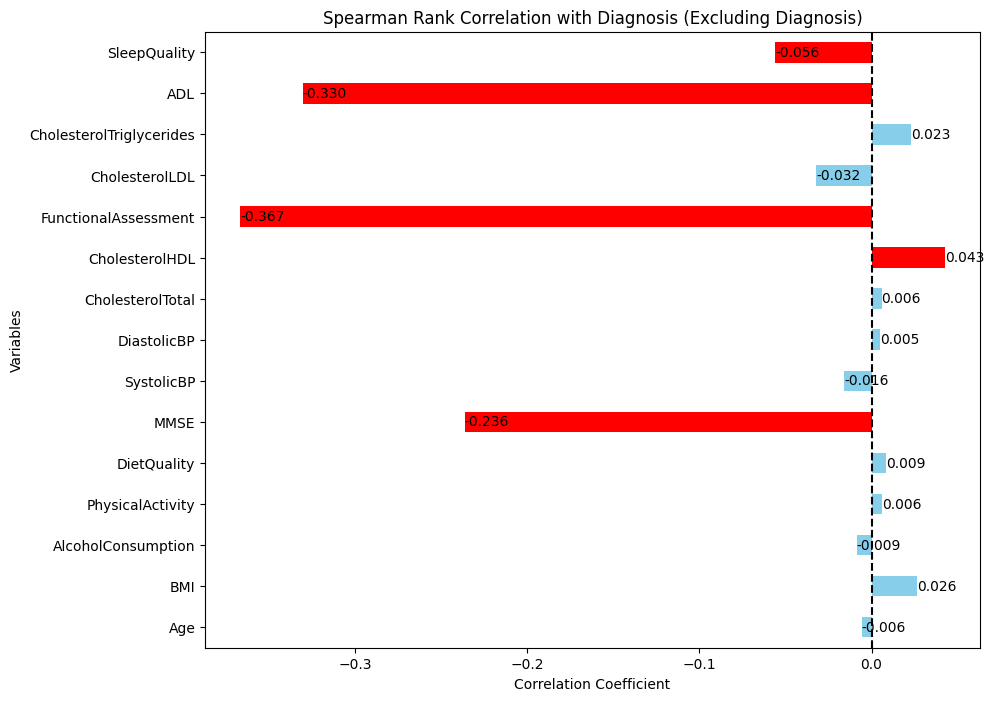

In [69]:
# Initialize a dictionary to store the correlation results
spearman_results = {}

# Perform Spearman Rank Correlation for each continuous variable, excluding 'Diagnosis'
for col in stats_continuous_vars_df.columns:
    if col != 'Diagnosis':  # Exclude 'Diagnosis' itself
        diagnosis = encoded_data['Diagnosis']
        stat, p = stats.spearmanr(diagnosis, stats_continuous_vars_df[col].dropna())
        
        # Store the results in the dictionary
        spearman_results[col] = (stat, p)
        
        # Print the results
        print(f'Spearman Rank Correlation for {col} with Diagnosis: Correlation={stat:.3f}, p={p:.3f}')

# Convert the results to a DataFrame for easier plotting
spearman_results_df = pd.DataFrame.from_dict(spearman_results, orient='index', columns=['Correlation', 'p-value'])

# Plot the correlation coefficients
plt.figure(figsize=(10, 8))
bars = spearman_results_df['Correlation'].plot(kind='barh', color=spearman_results_df['p-value'].apply(lambda x: 'red' if x < 0.05 else 'skyblue'))

plt.axvline(0, color='black', linestyle='--')  # Line at 0 to separate positive and negative correlations
plt.title('Spearman Rank Correlation with Diagnosis (Excluding Diagnosis)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Variables')

# Add correlation coefficient annotations next to each bar
for index, value in enumerate(spearman_results_df['Correlation']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

plt.show()


## Statistical Analysis on Categorical Data

### Chi-Square Test

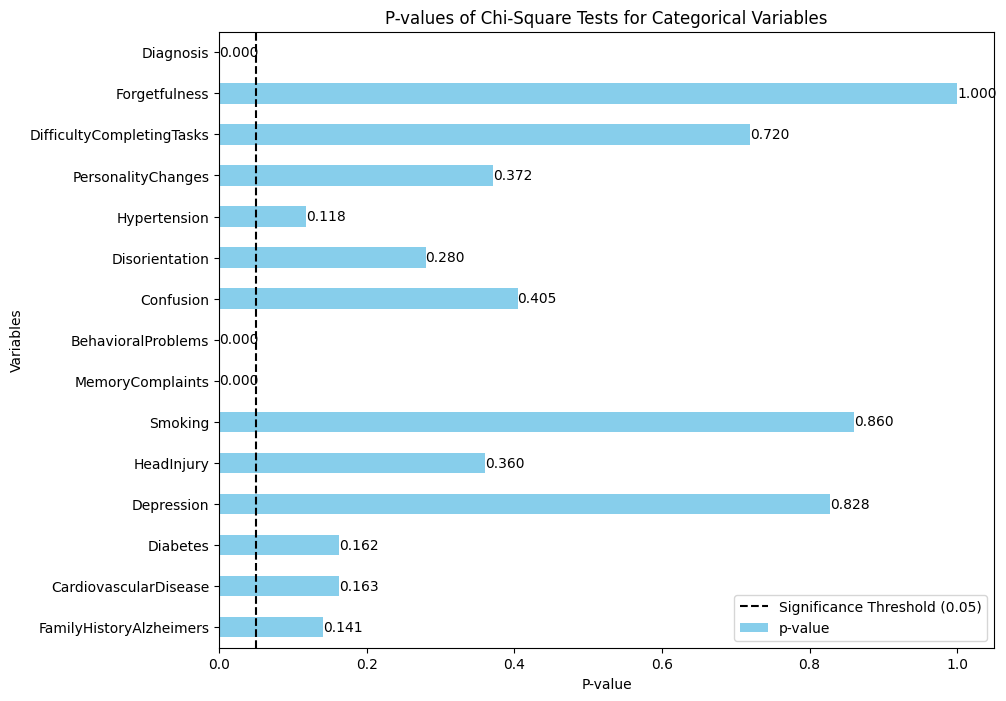

In [70]:
variables = stats_categorical_vars_df

# Initialize a dictionary to store p-values
p_values = {}

for var in variables.columns:
    # Generate the contingency table
    contingency_table = pd.crosstab(encoded_data['Diagnosis'], variables[var])

    if contingency_table.size > 0:
        try:
            # Perform Chi-square test
            chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
            p_values[var] = p
        except ValueError as e:
            print(f'Error for {var}: {e}')
    else:
        print(f'Chi-Square Test for {var} with Diagnosis: Skipped (empty contingency table)')

# Convert the p-values to a DataFrame for easier plotting
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p-value'])

# Plot the p-values
plt.figure(figsize=(10, 8))
bars = p_values_df['p-value'].plot(kind='barh', color=p_values_df['p-value'].apply(lambda x: 'red' if x < 0.05 else 'skyblue'))

plt.axvline(0.05, color='black', linestyle='--', label='Significance Threshold (0.05)')
plt.title('P-values of Chi-Square Tests for Categorical Variables')
plt.xlabel('P-value')
plt.ylabel('Variables')
plt.legend()

# Add p-value annotations next to each bar
for index, value in enumerate(p_values_df['p-value']):
    plt.text(value, index, f'{value:.3f}', va='center', ha='left')

plt.show()
